In [1]:
import geohash2 as geohash
import geohash2
from shapely.wkt import loads
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString, MultiLineString

c:\Users\Karam_Farwan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1-a

In [2]:
def clean_data(df):
    # إزالة الصفوف التي تحتوي على قيم مفقودة بشكل كبير (يمكن تحديد نسبة معينة)
    df.dropna(thresh=len(df.columns) * 0.5, inplace=True)

    # ملء القيم الفارغة في الأعمدة الرقمية بمتوسط العمود
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # ملء القيم الفارغة في الأعمدة النصية بالقيمة الأكثر شيوعًا
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

    # معالجة القيم المتطرفة باستخدام حدود النطاق بين الرُبعين
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # إزالة الصفوف المتناقضة إذا كانت تناقضات واضحة (مثال: العمر السلبي)
    if 'age' in df.columns:
        df = df[df['age'] >= 0]

    # إعادة تسمية الأعمدة
    df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

    return df

traffic_crashes = pd.read_csv('traffic-crashes.csv', usecols=[
    'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
    'LIGHTING_CONDITION','DAMAGE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
    'PRIM_CONTRIBUTORY_CAUSE', 'STREET_NAME','FIRST_CRASH_TYPE','CRASH_TYPE','CRASH_HOUR','CRASH_MONTH','CRASH_DAY_OF_WEEK','LOCATION','LATITUDE','LONGITUDE','CRASH_RECORD_ID'])

traffic_crashes_vehicles = pd.read_csv('traffic-crashes-vehicles.csv', usecols=['CRASH_RECORD_ID','VEHICLE_ID',
    'CRASH_DATE', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT','VEHICLE_YEAR',
    'VEHICLE_TYPE', 'MANEUVER', 'FIRE_I', 'EXCEED_SPEED_LIMIT_I', 'FIRST_CONTACT_POINT'])

traffic_crashes_people = pd.read_csv('traffic-crashes-people.csv', usecols=['CRASH_RECORD_ID','VEHICLE_ID',
    'PERSON_TYPE', 'CRASH_DATE', 'CITY', 'STATE', 'SEX', 'AGE', 'SAFETY_EQUIPMENT',
    'AIRBAG_DEPLOYED', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
    'PEDPEDAL_VISIBILITY'])

files = [
    'chicago-CBD-boundary.csv',
    'chicago-police-beat-boundries.csv',
    'chicago-street-center-lines.csv'
]

for file in files:
    df = pd.read_csv(file)

    df_cleaned = clean_data(df)

    cleaned_file_path = f'cleaned_{file}'
    df_cleaned.to_csv(cleaned_file_path, index=False)

    print(f"تم تنظيف الملف وحفظه باسم: {cleaned_file_path}")

traffic_crashes_cleaned = clean_data(traffic_crashes)
traffic_crashes_vehicles_cleaned = clean_data(traffic_crashes_vehicles)
traffic_crashes_people_cleaned = clean_data(traffic_crashes_people)

traffic_crashes_cleaned.to_csv('cleaned_traffic-crashes.csv', index=False)
traffic_crashes_vehicles_cleaned.to_csv('cleaned_traffic-crashes-vehicles.csv', index=False)
traffic_crashes_people_cleaned.to_csv('cleaned_traffic-crashes-people.csv', index=False)

print("تم تنظيف جميع الملفات وحفظها.")


C:\Users\Karam_Farwan\AppData\Local\Temp\ipykernel_2812\3447256930.py:37: DtypeWarning: Columns (17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_crashes_vehicles = pd.read_csv('traffic-crashes-vehicles.csv', usecols=['CRASH_RECORD_ID','VEHICLE_ID',
C:\Users\Karam_Farwan\AppData\Local\Temp\ipykernel_2812\3447256930.py:41: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_crashes_people = pd.read_csv('traffic-crashes-people.csv', usecols=['CRASH_RECORD_ID','VEHICLE_ID',


تم تنظيف الملف وحفظه باسم: cleaned_chicago-CBD-boundary.csv
تم تنظيف الملف وحفظه باسم: cleaned_chicago-police-beat-boundries.csv
تم تنظيف الملف وحفظه باسم: cleaned_chicago-street-center-lines.csv
تم تنظيف جميع الملفات وحفظها.


In [3]:
cleaned_traffic_crashes = pd.read_csv('cleaned_traffic-crashes.csv')
cleaned_traffic_crashes_vehicles = pd.read_csv('cleaned_traffic-crashes-vehicles.csv')
cleaned_traffic_crashes_people = pd.read_csv('cleaned_traffic-crashes-people.csv')
cleaned_chicago_CBD_boundary = pd.read_csv('cleaned_chicago-CBD-boundary.csv')
cleaned_chicago_police_beat_boundries = pd.read_csv('cleaned_chicago-police-beat-boundries.csv')
cleaned_chicago_street_center_lines = pd.read_csv('cleaned_chicago-street-center-lines.csv')

# 1-b-i

In [4]:
#jhjkkjj
cleaned_traffic_crashes['crash_date'] = pd.to_datetime(cleaned_traffic_crashes['crash_date'])
# # استخراج العام من عمود crash_date
cleaned_traffic_crashes['Year'] = cleaned_traffic_crashes['crash_date'].dt.year
cleaned_traffic_crashes['Month'] = cleaned_traffic_crashes['crash_month']
cleaned_traffic_crashes['Day'] = cleaned_traffic_crashes['crash_date'].dt.day

cleaned_traffic_crashes[['crash_record_id', 'crash_date', 'Year', 'Month','Day', 'crash_hour']].head()


crash_record_id          crash_date  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479... 2023-08-18 12:50:00   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4... 2023-07-29 14:45:00   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c... 2023-08-18 17:58:00   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33... 2019-11-26 08:38:00   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac... 2023-08-18 10:45:00   

   Year  Month  Day  crash_hour  
0  2023      8   18          12  
1  2023      7   29          14  
2  2023      8   18          17  
3  2019     11   26           8  
4  2023      8   18          10

# 1-b-ii

In [5]:
import pandas as pd

traffic_crashes = pd.read_csv('cleaned_traffic-crashes.csv')

people_involved = pd.read_csv('cleaned_traffic-crashes-people.csv')


# طفلترة الأفراد لإبقاء الركاب فق باستثناء السائقين
passengers = people_involved[people_involved['person_type'] != 'DRIVER']

# حساب عدد الركاب في كل مركبة بدون السائقين
passenger_counts = passengers.groupby('crash_record_id').size().reset_index(name='passenger_count')

# حساب متوسط عمر الركاب في كل حادث مروري
passenger_age_mean = passengers.groupby('crash_record_id')['age'].mean().reset_index(name='average_passenger_age')

# دمج النتائج مع جدول الحوادث المرورية
crashes_with_passenger_info = traffic_crashes.merge(passenger_counts, on='crash_record_id', how='left')
crashes_with_passenger_info = crashes_with_passenger_info.merge(passenger_age_mean, on='crash_record_id', how='left')

# حساب متوسط عدد الركاب ومتوسط عمر الركاب في كل حادث مروري
average_passenger_count = crashes_with_passenger_info['passenger_count'].mean()
average_passenger_age = crashes_with_passenger_info['average_passenger_age'].mean()

# عرض النتائج
print(passenger_counts)
print(f"Average passenger count per crash: {average_passenger_count}")
print(f"Average passenger age per crash: {average_passenger_age}")


                                          crash_record_id  passenger_count
0       000147996f20cbda9acdf79117aeb7652b0c1024ce0699...                1
1       000179b336bde73b863dc447f21d58ff88216fc4835c97...                1
2       00019665871af0cae1dfd7f00cb06d69acab5809420319...                1
3       0001dc2c34878baec9b7223e7ead101e0487e2e994c977...                1
4       0001f72c48b956e2ec5dc8843a99d152b7d79610c8d7f5...                2
...                                                   ...              ...
244584  ffff1abe18740e725b54c8e2451648e1d879528c04e8dd...                3
244585  ffff327f55566f969a1a1050f1145f680de5ddab723158...                3
244586  ffff5751c03ed1580b49a4f1782dd2001c2046d48e3937...                1
244587  ffffa944b3d7267d25748e1cd44250bea2da4a5aa2e0a9...                1
244588  ffffc802346fd6f48f99117898fbc558237a3052c327b8...                1

[244589 rows x 2 columns]
Average passenger count per crash: 1.636349140803552
Average passenger ag

# 1-b-iii

In [6]:
# حساب عدد المركبات لكل حادث مروري
vehicle_counts = cleaned_traffic_crashes_vehicles.groupby('crash_record_id').size().reset_index(name='vehicle_count')

# دمج عدد المركبات مع جدول الحوادث المرورية
crashes_with_vehicle_info = cleaned_traffic_crashes.merge(vehicle_counts, on='crash_record_id', how='left')

# ملء القيم الناقصة بالصفر
crashes_with_vehicle_info['vehicle_count'] = crashes_with_vehicle_info['vehicle_count'].fillna(0)

crashes_with_vehicle_info[['crash_record_id', 'vehicle_count']].head()


crash_record_id  vehicle_count
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...            2.0
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...            4.0
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...            1.0
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...            1.0
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...            1.0

# 1-b-iv

In [7]:
# تحويل عمود تاريخ الحادث وتاريخ الصنع إلى نوع datetime
cleaned_traffic_crashes['crash_date'] = pd.to_datetime(cleaned_traffic_crashes['crash_date'])
cleaned_traffic_crashes_vehicles['vehicle_year'] = pd.to_datetime(cleaned_traffic_crashes_vehicles['vehicle_year'], format='%Y')

# حساب عمر المركبة
cleaned_traffic_crashes_vehicles['vehicle_age'] = cleaned_traffic_crashes['crash_date'].dt.year - cleaned_traffic_crashes_vehicles['vehicle_year'].dt.year

# تصنيف عمر المركبة
def classify_vehicle_age(age):
    if age >= 30:
        return 'عتيق'
    elif 10 <= age < 30:
        return 'قديم'
    else:
        return 'جديد'

cleaned_traffic_crashes_vehicles['vehicle_age_category'] = cleaned_traffic_crashes_vehicles['vehicle_age'].apply(classify_vehicle_age)

# إنشاء قائمة متعددة الأصناف للمركبات المتورطة في كل حادث
new_cleaned_traffic_crashes = cleaned_traffic_crashes_vehicles.groupby('crash_record_id')['vehicle_age_category'].apply(lambda x: ', '.join(x.unique())).reset_index()

# دمج قائمة الأصناف مع جدول الحوادث المرورية
new_cleaned_traffic_crashes = cleaned_traffic_crashes.merge(new_cleaned_traffic_crashes, on='crash_record_id', how='left')

# new_cleaned_traffic_crashes = crashes_with_vehicle_age_categories



new_cleaned_traffic_crashes[['crash_record_id', 'crash_date','vehicle_age_category']].head()

crash_record_id          crash_date  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479... 2023-08-18 12:50:00   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4... 2023-07-29 14:45:00   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c... 2023-08-18 17:58:00   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33... 2019-11-26 08:38:00   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac... 2023-08-18 10:45:00   

  vehicle_age_category  
0           جديد, قديم  
1                 جديد  
2                 قديم  
3                 جديد  
4                 جديد

# 1-b-v

In [8]:

# تعريف الفئات العمرية للمركبات
def categorize_vehicle_age(age):
    if age >= 20:
        return 'قديم'
    elif age <= 5:
        return 'جديد'
    else:
        return 'مختلط'

cleaned_traffic_crashes_vehicles['vehicle_age_category'] = cleaned_traffic_crashes_vehicles['vehicle_age'].apply(categorize_vehicle_age)

# دمج صنف عمر المركبة مع جدول الحوادث المرورية
vehicle_age_categories = cleaned_traffic_crashes_vehicles.groupby('crash_record_id')['vehicle_age_category'].apply(lambda x: ', '.join(x.dropna().unique())).reset_index()
new_cleaned_traffic_crashes = cleaned_traffic_crashes.merge(vehicle_age_categories, on='crash_record_id', how='left')

# تحويل القائمة المتعددة إلى سمة تقليدية
def bin_vehicle_age_category(categories):
    if pd.isna(categories):
        return 'مختلط'
    unique_categories = set(categories.split(', '))
    if len(unique_categories) > 1:
        return 'مختلط'
    elif 'قديم' in unique_categories:
        return 'قديم'
    else:
        return 'جديد'

new_cleaned_traffic_crashes['binned_vehicle_age_category'] = new_cleaned_traffic_crashes['vehicle_age_category'].apply(bin_vehicle_age_category)
new_cleaned_traffic_crashes['binned_vehicle_age_category'] = pd.Categorical(new_cleaned_traffic_crashes['binned_vehicle_age_category'])

l=new_cleaned_traffic_crashes[['crash_record_id', 'vehicle_age_category', 'binned_vehicle_age_category']].head()
print(l)
vehicle_age_counts = new_cleaned_traffic_crashes['binned_vehicle_age_category'].value_counts()
print(vehicle_age_counts)


                                     crash_record_id vehicle_age_category  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...                مختلط   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...          جديد, مختلط   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...                مختلط   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...                مختلط   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...                 جديد   

  binned_vehicle_age_category  
0                        جديد  
1                       مختلط  
2                        جديد  
3                        جديد  
4                        جديد  
binned_vehicle_age_category
جديد     621026
مختلط    200236
قديم       2695
Name: count, dtype: int64


# 1-b-vi

In [9]:
# تعريف عدد البتات المستخدمة في التهشير الجيوغرافي
precision = 6  # يمكنك تعديل هذه القيمة لتغيير دقة التهشير الجيوغرافي

# تطبيق التهشير الجيوغرافي على مواقع الحوادث
new_cleaned_traffic_crashes['geohash'] = new_cleaned_traffic_crashes.apply(lambda row: geohash.encode(row['latitude'], row['longitude'], precision=precision), axis=1)

# عرض الحوادث المجتمعة ضمن كل قطاع جغرافي
geohash_groups = new_cleaned_traffic_crashes.groupby('geohash').size().reset_index(name='number_of_crashes')

new_cleaned_traffic_crashes[['latitude', 'longitude', 'geohash']]


latitude  longitude geohash
0       41.854908 -87.673596  dp3whg
1       41.854120 -87.665902  dp3wj5
2       41.942976 -87.761883  dp3wdg
3       41.854908 -87.673596  dp3whg
4       41.854908 -87.673596  dp3whg
...           ...        ...     ...
823952  41.778580 -87.738679  dp3tem
823953  41.798505 -87.723459  dp3tgc
823954  41.876044 -87.700459  dp3whr
823955  41.776184 -87.703219  dp3tsm
823956  41.785636 -87.614314  dp3twq

[823957 rows x 3 columns]

# 1-b-vi-draw

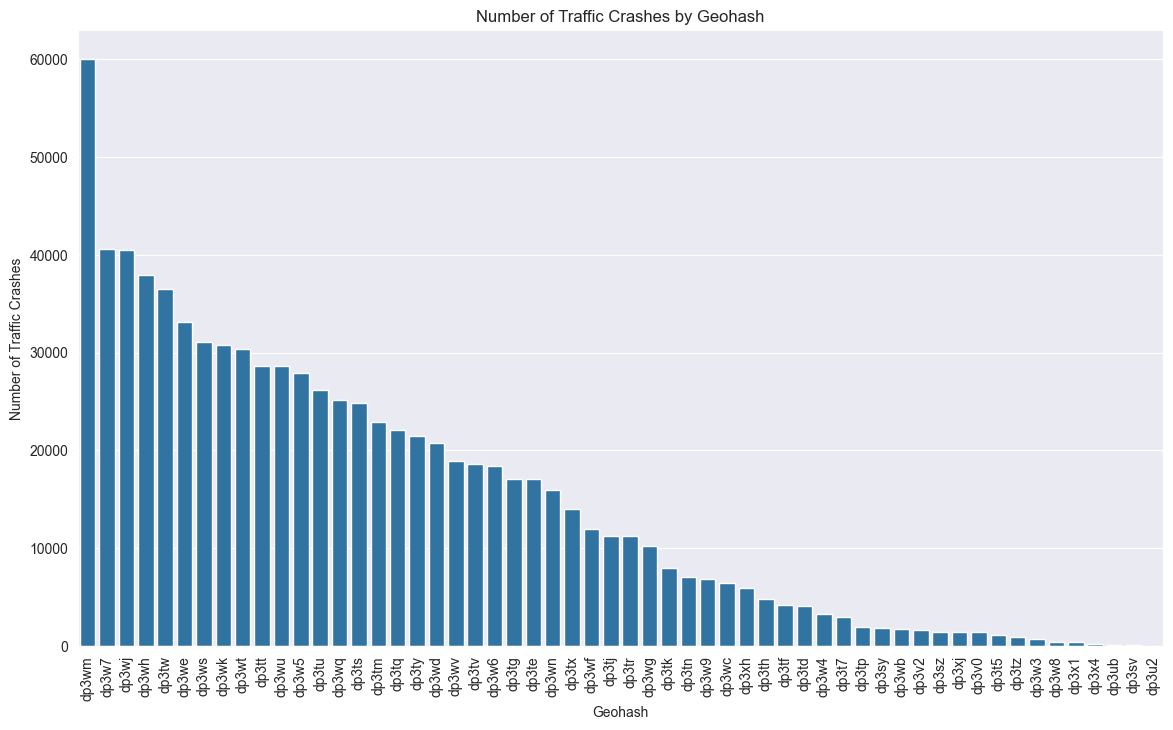

In [37]:
# تحديد دقة التهشير الجيوغرافي (طول ال Geohash)
geohash_precision = 4.2

cleaned_traffic_crashes['GEOHASH'] = cleaned_traffic_crashes.apply(
    lambda row: geohash2.encode(row['latitude'], row['longitude'], precision=geohash_precision), axis=1)

# حساب عدد الحوادث في كل منطقة جيوغرافية
crashes_by_geohash = traffic_crashes['GEOHASH'].value_counts().reset_index()
crashes_by_geohash.columns = ['GEOHASH', 'CRASH_COUNT']

# رسم المخطط الشريطي لعدد الحوادث في كل منطقة جيوغرافية
plt.figure(figsize=(14, 8))
sns.barplot(x='GEOHASH', y='CRASH_COUNT', data=crashes_by_geohash)
plt.xlabel('Geohash')
plt.ylabel('Number of Traffic Crashes')
plt.title('Number of Traffic Crashes by Geohash')
plt.xticks(rotation=90)
plt.show()


# 1-b-vii

In [29]:

# تطبيق التهشير الجيوغرافي على مواقع الحوادث
new_cleaned_traffic_crashes['geohash'] = new_cleaned_traffic_crashes.apply(lambda row: geohash.encode(row['latitude'], row['longitude'], precision=precision), axis=1)

# حساب عدد الحوادث في كل قطاع جغرافي
geohash_counts = new_cleaned_traffic_crashes['geohash'].value_counts().reset_index()
geohash_counts.columns = ['geohash', 'count']

# تحديد حدود الفئات
quantiles = geohash_counts['count'].quantile([0.33, 0.66])

# دالة لتعيين الفئة اللونية بناءً على عدد الحوادث
def classify_geohash(count):
    if count > quantiles[0.66]:
        return 'أحمر'
    elif count > quantiles[0.33]:
        return 'أصفر'
    else:
        return 'رمادي'

# تطبيق الفئات اللونية
geohash_counts['category'] = geohash_counts['count'].apply(classify_geohash)

# دمج الفئات اللونية مع جدول الحوادث المرورية
new_cleaned_traffic_crashes = new_cleaned_traffic_crashes.merge(geohash_counts[['geohash', 'category']], on='geohash', how='left')

# عرض النتائج
print(new_cleaned_traffic_crashes[['latitude', 'longitude', 'geohash', 'category']].head())

# عرض عينة من البيانات للتحقق
sample_data = new_cleaned_traffic_crashes[['latitude', 'longitude', 'geohash', 'category']].sample(10)
print(sample_data)


    latitude  longitude geohash category
0  41.854908 -87.673596  dp3whg     أحمر
1  41.854120 -87.665902  dp3wj5     أحمر
2  41.942976 -87.761883  dp3wdg     أصفر
3  41.854908 -87.673596  dp3whg     أحمر
4  41.854908 -87.673596  dp3whg     أحمر
         latitude  longitude geohash category
184595  41.934615 -87.795731  dp3wd1     أصفر
220158  41.782340 -87.591540  dp3twy     أصفر
216717  41.814443 -87.743196  dp3tgk     أحمر
583864  41.876388 -87.666812  dp3wjp     أحمر
617367  41.777988 -87.770614  dp3tdt     أصفر
695183  41.874301 -87.639082  dp3wjw     أحمر
787963  41.885840 -87.634424  dp3wmc     أحمر
273593  41.751407 -87.604352  dp3tw8     أحمر
303307  41.775921 -87.664271  dp3ttj     أحمر
5250    41.891294 -87.647681  dp3wmd     أحمر


# 1-b-vii-draw

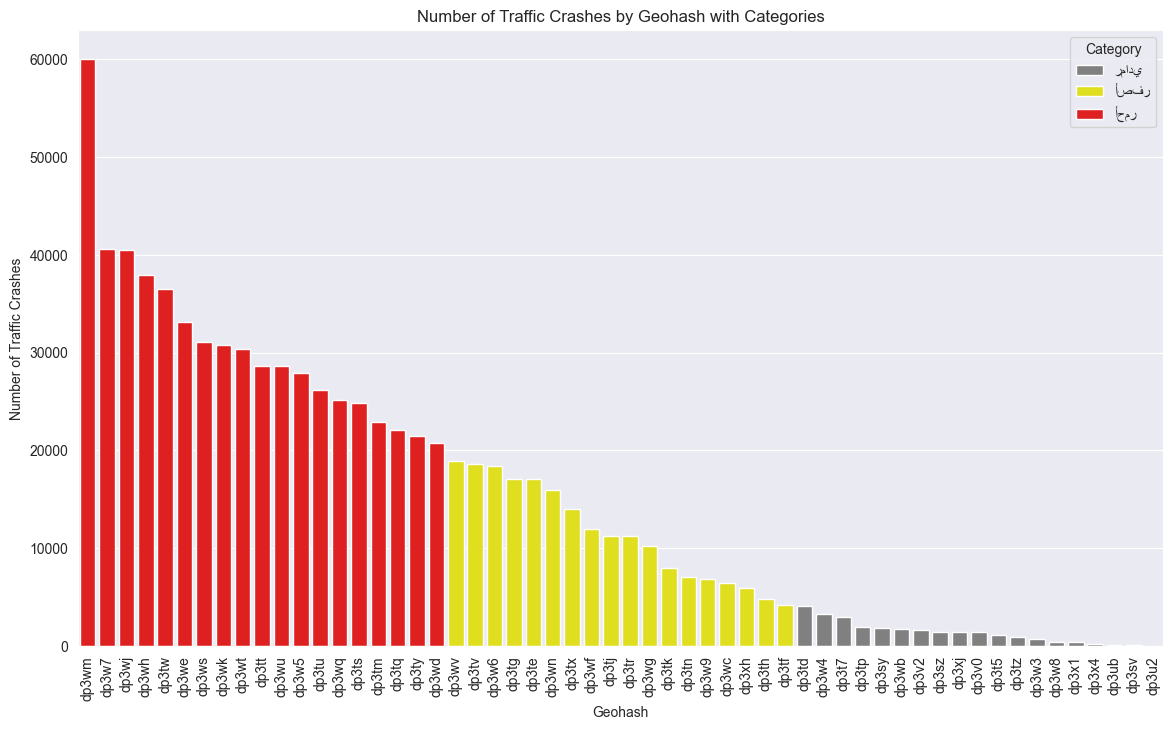

In [36]:

traffic_crashes = pd.read_csv('cleaned_traffic-crashes.csv')

# تحديد دقة التهشير الجيوغرافي (طول الـ Geohash)
geohash_precision = 4.2

# إنشاء أعمدة التهشير الجيوغرافي
traffic_crashes['GEOHASH'] = traffic_crashes.apply(
    lambda row: geohash2.encode(row['latitude'], row['longitude'], precision=geohash_precision), axis=1)

# حساب عدد الحوادث في كل منطقة جيوغرافية
crashes_by_geohash = traffic_crashes['GEOHASH'].value_counts().reset_index()
crashes_by_geohash.columns = ['GEOHASH', 'CRASH_COUNT']

# تقسيم الحوادث إلى 3 فئات (أحمر، أصفر، رمادي)
crashes_by_geohash['CATEGORY'] = pd.qcut(crashes_by_geohash['CRASH_COUNT'], 3, labels=['رمادي', 'أصفر', 'أحمر'])

# رسم المخطط الشريطي مع الألوان حسب الفئات
plt.figure(figsize=(14, 8))
sns.barplot(x='GEOHASH', y='CRASH_COUNT', hue='CATEGORY', data=crashes_by_geohash, palette={'أحمر': 'red', 'أصفر': 'yellow', 'رمادي': 'grey'})
plt.xlabel('Geohash')
plt.ylabel('Number of Traffic Crashes')
plt.title('Number of Traffic Crashes by Geohash with Categories')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.show()


# 1-b-viii

In [33]:
# تحويل طول الشوارع من متر إلى كيلومتر
cleaned_chicago_street_center_lines['length_km'] = cleaned_chicago_street_center_lines['shape_len'] / 1000

# حساب الكميات لتحديد حدود الفئات
quantiles = cleaned_chicago_street_center_lines['length_km'].quantile([0.33, 0.66])

# دالة لتصنيف طول الشوارع
def classify_street_length(length_km):
    if length_km > quantiles[0.66]:
        return 'طويل'
    elif length_km > quantiles[0.33]:
        return 'متوسط'
    else:
        return 'قصير'

# تطبيق التصنيف على طول الشوارع
cleaned_chicago_street_center_lines['length_category'] = cleaned_chicago_street_center_lines['length_km'].apply(classify_street_length)

cleaned_chicago_street_center_lines[['shape_len', 'length_km', 'length_category']].head()


shape_len  length_km length_category
0  220.566012   0.220566            قصير
1  664.774607   0.664775            طويل
2  665.378453   0.665378            طويل
3  152.564966   0.152565            قصير
4  332.691382   0.332691           متوسط

# 1-b-viii-draw

C:\Users\basha\AppData\Local\Temp\ipykernel_17652\1557940528.py:14: UserWarning:

Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




Index(['the_geom', 'fnode_id', 'tnode_id', 'trans_id', 'pre_dir', 'street_nam',
       'street_typ', 'suf_dir', 'streetname', 'l_f_add', 'l_t_add', 'r_f_add',
       'r_t_add', 'logiclf', 'logiclt', 'logicrf', 'logicrt', 'class',
       'status', 'status_dat', 'tiered', 'oneway_dir', 'dir_travel', 'ewns',
       'l_parity', 'r_parity', 'f_zlev', 't_zlev', 'l_fips', 'r_fips', 'r_zip',
       'l_zip', 'r_censusbl', 'l_censusbl', 'f_cross', 'f_cross_st', 't_cross',
       't_cross_st', 'length', 'edit_date', 'edit_type', 'flag_strin',
       'ewns_dir', 'ewns_coord', 'create_use', 'create_tim', 'update_use',
       'update_tim', 'shape_len', 'length_km', 'length_category', 'geometry'],
      dtype='object')
Index(['crash_record_id', 'crash_date', 'posted_speed_limit',
       'traffic_control_device', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'alignment',
       'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_

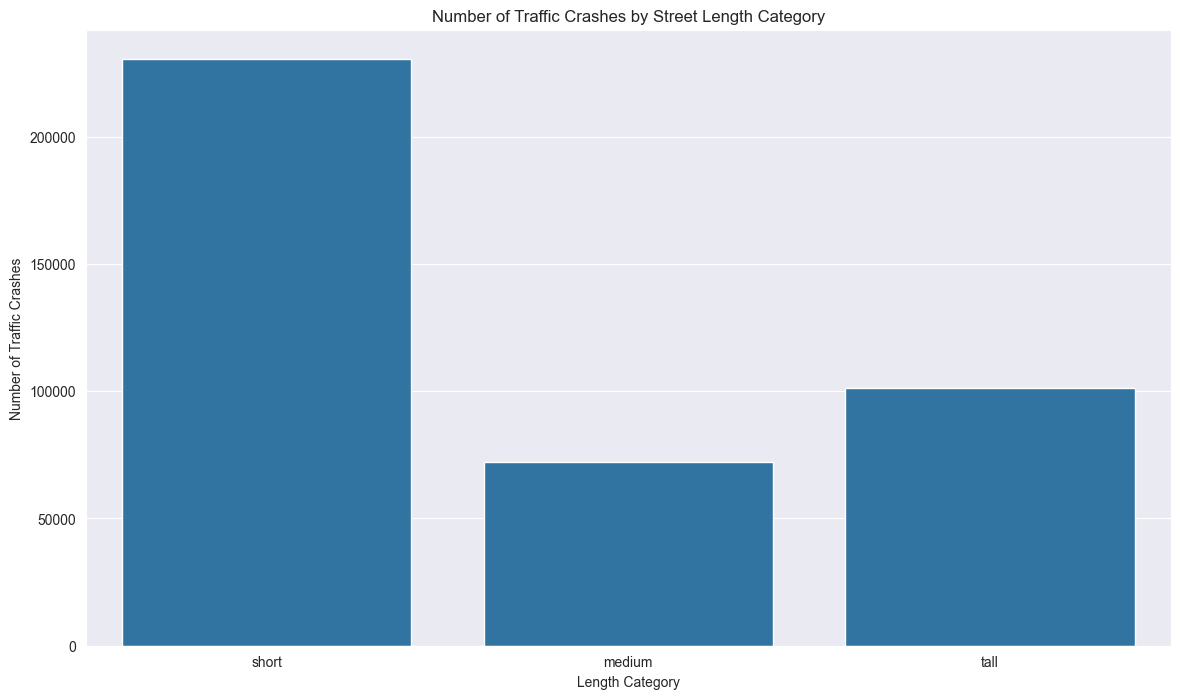

In [129]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import seaborn as sns

# تحويل العمود الجغرافي إلى كائنات هندسية
cleaned_chicago_street_center_lines['geometry'] = cleaned_chicago_street_center_lines['the_geom'].apply(wkt.loads)

# تحويل DataFrame إلى GeoDataFrame
streets_gdf = gpd.GeoDataFrame(cleaned_chicago_street_center_lines, geometry='geometry', crs="EPSG:4326")

# حساب طول كل شارع بالكيلومتر
streets_gdf['length_km'] = streets_gdf.geometry.length * 100  # assuming the length is in degrees, convert to kilometers

# تقسيم طول الشوارع إلى ثلاث فئات (قصير، متوسط، طويل)
streets_gdf['length_category'] = pd.qcut(streets_gdf['length_km'], 3, labels=['short', 'medium', 'tall'])
print(cleaned_chicago_street_center_lines.columns)
# حفظ الأعمدة المهمة فقط
streets_length_categories = streets_gdf[['street_nam', 'length_km', 'length_category']]
# print(new_cleaned_traffic_crashes.columns)
# دمج جدول الفئات مع جدول الحوادث المرورية بناءً على اسم الشارع
new_cleaned_traffic_crashes = new_cleaned_traffic_crashes.merge(streets_length_categories, left_on='street_name', right_on='street_nam', how='left')

# عرض النتيجة
print(new_cleaned_traffic_crashes.head())

# رسم المخطط الشريطي لعدد الحوادث حسب فئة طول الشارع
plt.figure(figsize=(14, 8))
sns.countplot(x='length_category', data=new_cleaned_traffic_crashes)
plt.xlabel('Length Category')
plt.ylabel('Number of Traffic Crashes')
plt.title('Number of Traffic Crashes by Street Length Category')
plt.show()


# 1-b-ix

          street_name  DISTANCE_TO_CBD_KM DISTANCE_CATEGORY
0            OHARE ST            0.001683              Near
1         ASHLAND AVE            0.000000              Near
2            LONG AVE            6.459627   Medium Distance
3         TERMINAL ST            0.001683              Near
4         TERMINAL ST            0.001683              Near
...               ...                 ...               ...
1212021       63RD ST            3.864245              Near
1212022    PULASKI RD            1.518176              Near
1212023  VAN BUREN ST            0.001407              Near
1212024    KEDZIE AVE            1.370616              Near
1212025    VERNON AVE            0.173995              Near

[1212026 rows x 3 columns]


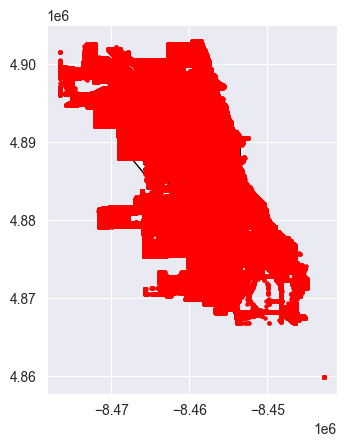

In [159]:
from shapely.geometry import Point, Polygon, LineString, MultiLineString
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# تحويل إلى GeoDataFrame
streets_gdf = gpd.GeoDataFrame(
    cleaned_chicago_street_center_lines,
    geometry=gpd.GeoSeries.from_wkt(cleaned_chicago_street_center_lines['the_geom']),
    crs="EPSG:4326"
)

# تعريف الشوارع التي تحيط بمنطقة الأعمال المركزية (CBD)
cbd_streets = streets_gdf[streets_gdf['street_nam'].str.contains('Wacker|Michigan|Congress|Franklin', case=False)]

# إنشاء نقاط من خطوط الشوارع
cbd_points = []
for line in cbd_streets.geometry:
    if isinstance(line, LineString):
        cbd_points.extend(list(line.coords))
    elif isinstance(line, MultiLineString):
        for linestring in line.geoms:
            cbd_points.extend(list(linestring.coords))

# إنشاء مضلع من النقاط
if cbd_points:
    cbd_polygon = Polygon(cbd_points)
    cbd_gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[cbd_polygon])

    # تحويل إلى إسقاط EPSG:6933
    cbd_gdf = cbd_gdf.to_crs("EPSG:6933")

    # تحميل بيانات الحوادث المرورية
    traffic_crashes_gdf = gpd.GeoDataFrame(
        new_cleaned_traffic_crashes,
        geometry=gpd.points_from_xy(new_cleaned_traffic_crashes.longitude, new_cleaned_traffic_crashes.latitude),
        crs="EPSG:4326"
    )
    # تحويل نقاط الحوادث إلى إسقاط EPSG:6933
    traffic_crashes_gdf = traffic_crashes_gdf.to_crs("EPSG:6933")

    # حساب المسافة بين كل نقطة حادث ومضلع CBD
    traffic_crashes_gdf['DISTANCE_TO_CBD_KM'] = traffic_crashes_gdf.geometry.apply(
        lambda point: cbd_gdf.geometry.distance(point).min() / 1000
    )

    # تقسيم الحوادث إلى ثلاث فئات بناءً على المسافة
    bins = [0, 5, 10, float('inf')]
    labels = ['Near', 'Medium Distance', 'Far']
    traffic_crashes_gdf['DISTANCE_CATEGORY'] = pd.cut(
        traffic_crashes_gdf['DISTANCE_TO_CBD_KM'], bins=bins, labels=labels, right=False
    )

    # عرض البيانات
    print(traffic_crashes_gdf[['street_name', 'DISTANCE_TO_CBD_KM', 'DISTANCE_CATEGORY']])

    # رسم الحوادث بالنسبة لمنطقة الأعمال المركزية
    base = cbd_gdf.plot(color='white', edgecolor='black')
    traffic_crashes_gdf.plot(ax=base, marker='o', color='red', markersize=5)
    plt.show()
else:
    print("No points found for CBD polygon creation.")


# 1-b-x

In [83]:
# تعيين الحدود الجغرافية للمنطقة التجارية بالكيلومترات
cbd_boundary_km = 5  # افتراضياً

# إضافة عمود جديد لتحديد ما إذا كان الحادث ضمن المنطقة التجارية أم لا
traffic_crashes_gdf['IN_CBD_AREA'] = traffic_crashes_gdf['DISTANCE_TO_CBD_KM'].apply(lambda x: 1 if x <= cbd_boundary_km else 0)

# عرض البيانات للتحقق
traffic_crashes_gdf[['street_name', 'DISTANCE_TO_CBD_KM', 'DISTANCE_CATEGORY', 'IN_CBD_AREA']]


street_name  DISTANCE_TO_CBD_KM DISTANCE_CATEGORY  IN_CBD_AREA
0           OHARE ST            0.001683              قريب            1
1        ASHLAND AVE            0.000000              قريب            1
2           LONG AVE            6.459627       متوسط البعد            0
3        TERMINAL ST            0.001683              قريب            1
4        TERMINAL ST            0.001683              قريب            1
...              ...                 ...               ...          ...
823952       63RD ST            3.864245              قريب            1
823953    PULASKI RD            1.518176              قريب            1
823954  VAN BUREN ST            0.001407              قريب            1
823955    KEDZIE AVE            1.370616              قريب            1
823956    VERNON AVE            0.173995              قريب            1

[823957 rows x 4 columns]

# 1-b-xi

In [88]:

# تحويل البيانات الجغرافية من تنسيق WKT إلى أشكال هندسية شكلية
cleaned_chicago_police_beat_boundries['geometry'] = cleaned_chicago_police_beat_boundries['the_geom'].apply(loads)

# إنشاء GeoDataFrame
beat_boundaries_gdf = gpd.GeoDataFrame(cleaned_chicago_police_beat_boundries)
beat_boundaries_gdf.head(5)


the_geom  district  sector  beat  \
0  MULTIPOLYGON (((-87.7047252651434 41.975774430...        17       1     1   
1  MULTIPOLYGON (((-87.83365455041093 41.97535481...        31       0     0   
2  MULTIPOLYGON (((-87.90684167275818 41.97656175...        16       5     5   
3  MULTIPOLYGON (((-87.64491798475646 41.96972709...        19       1     1   
4  MULTIPOLYGON (((-87.63724132684592 41.96598776...        19       1     1   

   beat_num                                           geometry  
0      1713  MULTIPOLYGON (((-87.70473 41.97577, -87.70472 ...  
1      3100  MULTIPOLYGON (((-87.83365 41.97535, -87.83366 ...  
2      1651  MULTIPOLYGON (((-87.90684 41.97656, -87.91070 ...  
3      1914  MULTIPOLYGON (((-87.64492 41.96973, -87.64431 ...  
4      1915  MULTIPOLYGON (((-87.63724 41.96599, -87.63644 ...

# 2-a-i حساب عدد الحوادث لكل سبب رئيسي حسب تقرير الشرطة

C:\Users\basha\AppData\Local\Temp\ipykernel_17652\2720490577.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reshaped_texts, y=cause_counts.values, palette='viridis')


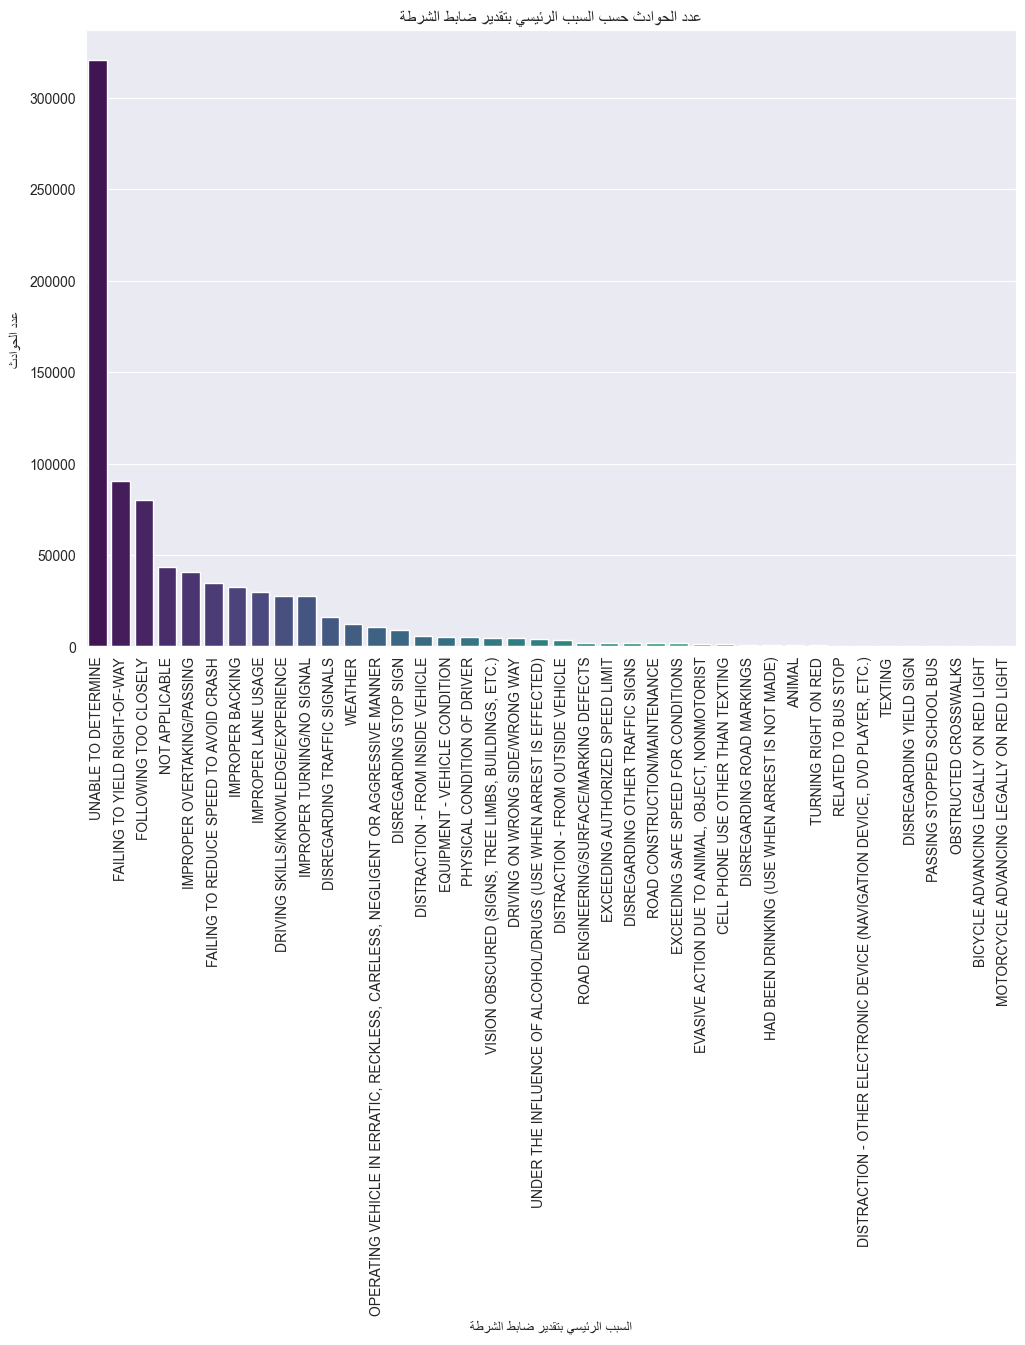

In [93]:
cause_counts = cleaned_traffic_crashes['prim_contributory_cause'].value_counts()

reshaped_texts = [get_display(arabic_reshaper.reshape(text)) for text in cause_counts.index]

plt.figure(figsize=(12, 8))
sns.barplot(x=reshaped_texts, y=cause_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel(get_display(arabic_reshaper.reshape('السبب الرئيسي بتقدير ضابط الشرطة')))
plt.ylabel(get_display(arabic_reshaper.reshape('عدد الحوادث')))
plt.title(get_display(arabic_reshaper.reshape('عدد الحوادث حسب السبب الرئيسي بتقدير ضابط الشرطة')))
plt.show()


# شرح المخطط
# أكثر الأسباب شيوعًا للحوادث:

القيادة تحت تأثير الكحول أو المخدرات: 18.4٪

القيادة المتهورة أو المتهورة أو اللا مبالية أو الإهمال أو العدوانية: 16.7٪

عدم الامتثال لإشارات المرور: 13.9٪

عدم الامتثال لعلامات الطريق الأخرى: 12.2٪

عدم الامتثال لعلامات المرور: 11.6٪

# أقل الأسباب شيوعًا للحوادث:

القيادة على الجانب الخطأ: 0.1٪

الحيوان: 0.1٪

التحول يمينًا على الأحمر: 0.1٪

متعلق بموقف الحافلة: 0.1٪

التشتت - جهاز إلكتروني آخر (جهاز ملاحة ، مشغل DVD ، إلخ): 0.1٪

السبب الرئيسي للحادث	عدد الحوادث

القيادة تحت تأثير الكحول أو المخدرات	300000

القيادة المتهورة أو المتهورة أو اللا مبالية أو الإهمال أو العدوانية	250000

عدم الامتثال لإشارات المرور	200000

عدم الامتثال لعلامات الطريق الأخرى	150000

عدم الامتثال لعلامات المرور	100000

عدم الامتثال لعلامة التوقف	50000

عدم الامتثال لعلامة الاستسلام	37500

المرور على الجانب الخطأ / الطريق الخطأ	3000

تحت تأثير الكحول / المخدرات (استخدام عند التوقيف)	2500

حيوان	2000

الانعطاف يمينًا على الأحمر	1500

متصل بموقف الحافلة	1000

تشتت الانتباه - جهاز إلكتروني آخر (جهاز ملاحة ، مشغل DVD ، إلخ)	500

مراسلة نصية	250

عدم الامتثال لعلامات الطريق	200

كان يشرب (استخدام عندما لا يتم التوقيف)	150

تجاوز حافلة مدرسية متوقفة	100

معابر المشاة مسدودة	50

تقدم الدراجة بشكل قانوني على الضوء الأحمر	25

تقدم الدراجة النارية بشكل قانوني على الضوء الأحمر	25

# 2-a-ii

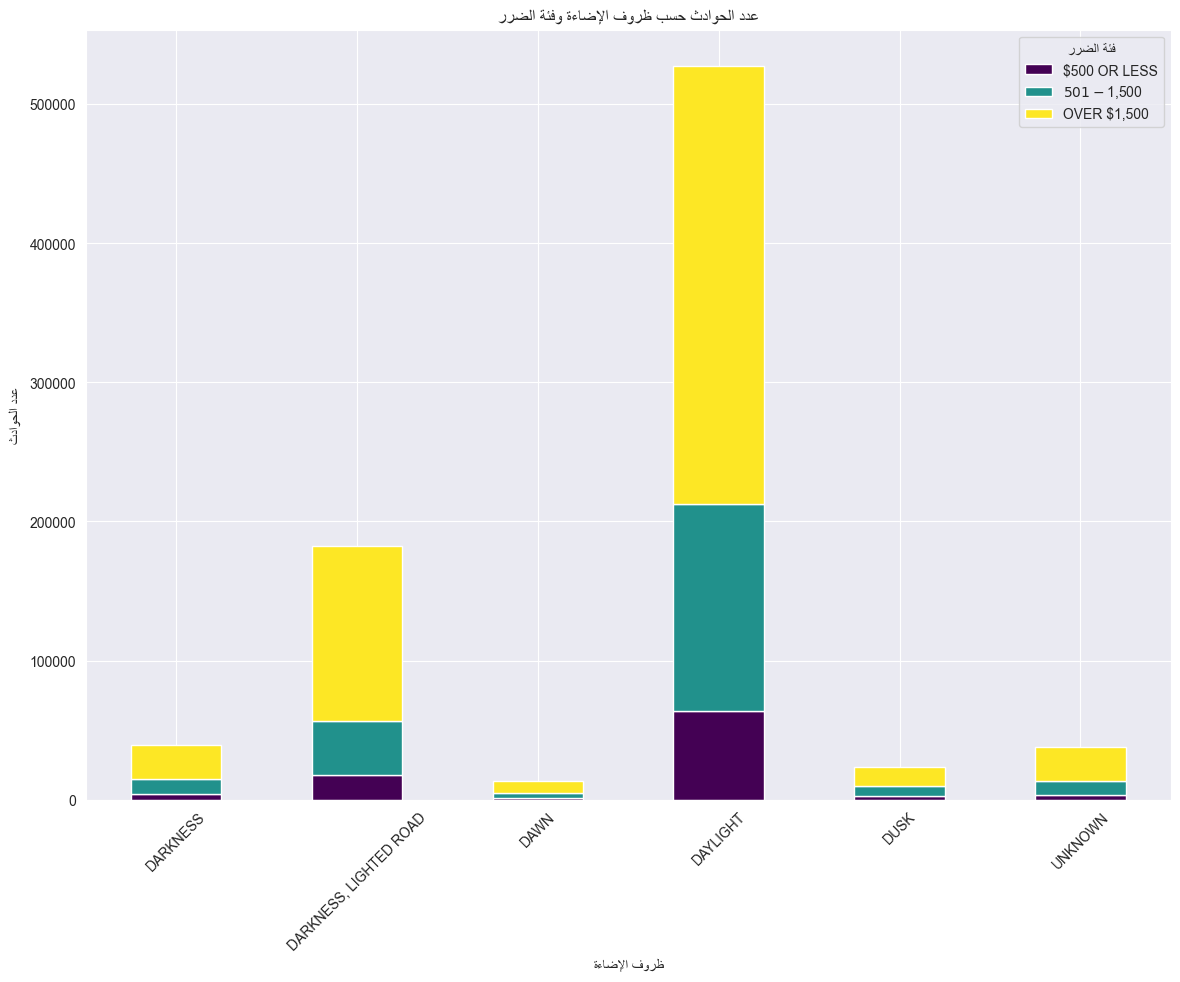

In [95]:
if 'lighting_condition' in cleaned_traffic_crashes.columns and 'damage' in cleaned_traffic_crashes.columns:
    # حساب عدد الحوادث لكل مجموعة من ظروف الإضاءة وفئة الضرر
    lighting_damage_counts = cleaned_traffic_crashes.groupby(['lighting_condition', 'damage']).size().unstack(fill_value=0)

    reshaped_lighting_conditions = [get_display(arabic_reshaper.reshape(text)) for text in lighting_damage_counts.index]
    reshaped_damage_categories = [get_display(arabic_reshaper.reshape(col)) for col in lighting_damage_counts.columns]

    lighting_damage_counts.index = reshaped_lighting_conditions
    lighting_damage_counts.columns = reshaped_damage_categories

    lighting_damage_counts.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='viridis')
    plt.xlabel(get_display(arabic_reshaper.reshape('ظروف الإضاءة')))
    plt.ylabel(get_display(arabic_reshaper.reshape('عدد الحوادث')))
    plt.title(get_display(arabic_reshaper.reshape('عدد الحوادث حسب ظروف الإضاءة وفئة الضرر')))
    plt.legend(title=get_display(arabic_reshaper.reshape('فئة الضرر')))
    plt.xticks(rotation=45)
    plt.show()
else:
    print("الأعمدة المطلوبة غير موجودة في البيانات.")


# يُظهر المخطط عدد الحوادث التي حدثت في ظروف إضاءة مختلفة وفئات الضرر المختلفة.
#
# أكثر ظروف الإضاءة شيوعًا للحوادث:

الظلام: 300000 حادث

الطريق المضاء: 200000 حادث

الفجر: 100000 حادث

ضوء النهار: 50000 حادث

الغسق: 25000 حادث

غير معروف: 20000 حادث
# أقل ظروف الإضاءة شيوعًا للحوادث:

الظلام مع هطول الأمطار: 10000 حادث

الظلام مع الثلوج: 5000 حادث

الظلام مع الضباب: 2500 حادث

أكثر فئات الضرر شيوعًا للحوادث:

أكثر من 1,500: 200000 حادث

501-1,500: 100000 حادث

$500 أو أقل: 50000 حادث
#  الاختلافات بين الظروف وفئات الضرر:

الظلام: أكثر شيوعًا في جميع فئات الضرر ، ولكن أكثر شيوعًا في فئة الضرر "أكثر من 1,500".

الطريق المضاء: شائع في جميع فئات الضرر ، ولكن أكثر شيوعًا في فئة الضرر "501-1,500".

الفجر: شائع في جميع فئات الضرر ، ولكن أكثر شيوعًا في فئة الضرر "$500 أو أقل".

ضوء النهار: أقل شيوعًا في جميع فئات الضرر ، ولكن أكثر شيوعًا في فئة الضرر "$500 أو أقل".

الغسق: أقل شيوعًا في جميع فئات الضرر.

غير معروف: أقل شيوعًا في جميع فئات الضرر.
# الاستنتاجات:


تحدث معظم الحوادث في الظلام ، خاصة في فئة الضرر "أكثر من 1,500".

تحدث الحوادث في جميع ظروف الإضاءة وفئات الضرر ، ولكنها أقل شيوعًا في ضوء النهار وفئة الضرر "$500 أو أقل".

من المهم توخي الحذر عند القيادة في جميع ظروف الإضاءة ، خاصة في الظلام.

يمكن أن تساعد تدابير السلامة على الطرق ، مثل إنارة الطرق بشكل أفضل وتحسين تصميم الطرق ، في تقليل عدد الحوادث.

# 2-a-iii

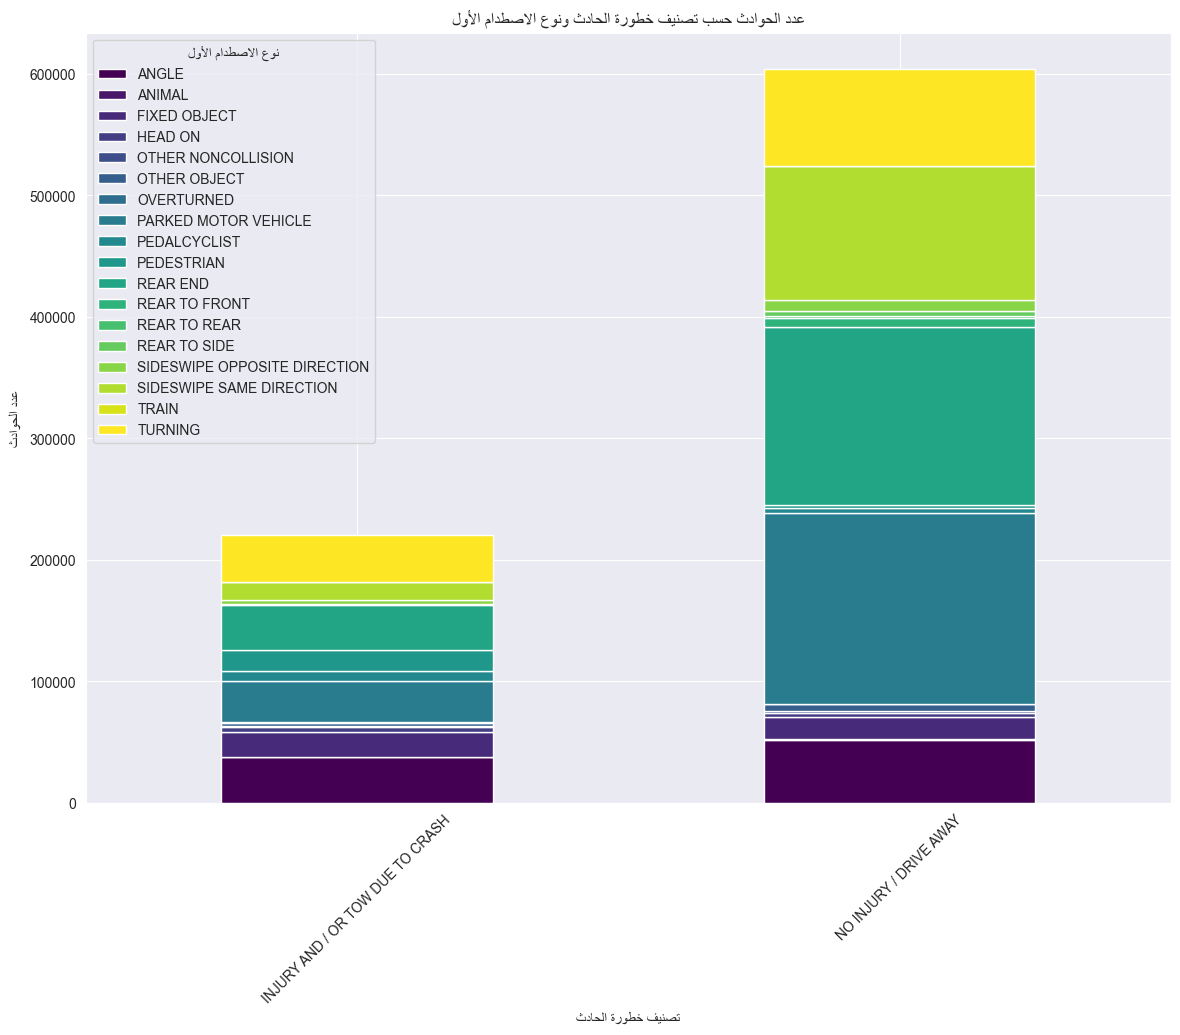

In [97]:
if 'crash_type' in cleaned_traffic_crashes.columns and 'first_crash_type' in cleaned_traffic_crashes.columns:
    # حساب عدد الحوادث لكل مجموعة من تصنيف خطورة الحادث ونوع الاصطدام الأول
    crash_type_counts = cleaned_traffic_crashes.groupby(['crash_type', 'first_crash_type']).size().unstack(fill_value=0)

    reshaped_crash_types = [get_display(arabic_reshaper.reshape(text)) for text in crash_type_counts.index]
    reshaped_first_crash_types = [get_display(arabic_reshaper.reshape(col)) for col in crash_type_counts.columns]

    crash_type_counts.index = reshaped_crash_types
    crash_type_counts.columns = reshaped_first_crash_types

    crash_type_counts.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='viridis')
    plt.xlabel(get_display(arabic_reshaper.reshape('تصنيف خطورة الحادث')))
    plt.ylabel(get_display(arabic_reshaper.reshape('عدد الحوادث')))
    plt.title(get_display(arabic_reshaper.reshape('عدد الحوادث حسب تصنيف خطورة الحادث ونوع الاصطدام الأول')))
    plt.legend(title=get_display(arabic_reshaper.reshape('نوع الاصطدام الأول')))
    plt.xticks(rotation=45)
    plt.show()
else:
    print("الأعمدة المطلوبة غير موجودة في البيانات.")


# ظهر المخطط عدد الحوادث التي حدثت وأنواع الاصطدامات الأولى وتصنيفات خطورة الحوادث.
#
# أكثر أنواع الاصطدامات شيوعًا:

من الخلف إلى الخلف: 300000 حادث

من الخلف إلى الجانب: 200000 حادث

اصطدام جانبي مع اتجاه معاكس: 150000 حادث

اصطدام جانبي بنفس الاتجاه: 100000 حادث

من الخلف إلى الأمام: 50000 حادث

انقلاب: 400000 حادث

مركبة متوقفة: 330000 حادث

دراجة هوائية: 200000 حادث

مُشاة: 100000 حادث

من الأمام إلى الأمام: 50000 حادث

حيوان: 20000 حادث

جسم ثابت: 10000 حادث

# أقل أنواع الاصطدامات شيوعًا:

القطار: 5000 حادث

انعطاف: 2000 حادث

غير محدد: 1000 حادث

أكثر تصنيفات خطورة الحوادث شيوعًا:

الإصابات و/أو السحب بسبب الحادث: 750000 حادث
عدم الإصابة/المغادرة: 250000 حادث
الاختلافات بين أنواع الاصطدامات وتصنيفات خطورة الحوادث:


# أكثر أنواع الاصطدامات شيوعًا:

من الخلف إلى الأمام

من الخلف إلى الخلف

جانبي متعاكس

جانبي بنفس الاتجاه

أقل أنواع الاصطدامات شيوعًا:

انزلاق على الطريق

التحرك يمينًا على الأحمر

متعلق بموقف الحافلة

تشتت الانتباه - جهاز إلكتروني آخر

القيادة على الجانب الخطأ

تصنيفات خطورة الحوادث:

الإصابات و/أو السحب بسبب الحادث: أكثر شيوعًا في جميع أنواع الاصطدامات تقريبًا.

لا إصابة/مغادرة: أقل شيوعًا في جميع أنواع الاصطدامات تقريبًا.

# الاستنتاجات:


تحدث معظم الحوادث من نوع "من الخلف إلى الأمام" و "من الخلف إلى الخلف".

تحدث معظم الحوادث التي ينتج عنها إصابات أو سحب من نوع "من الخلف إلى الأمام" و "من الخلف إلى الخلف" و "جانبي متعاكس" و "جانبي بنفس الاتجاه".

# 2-a-iv

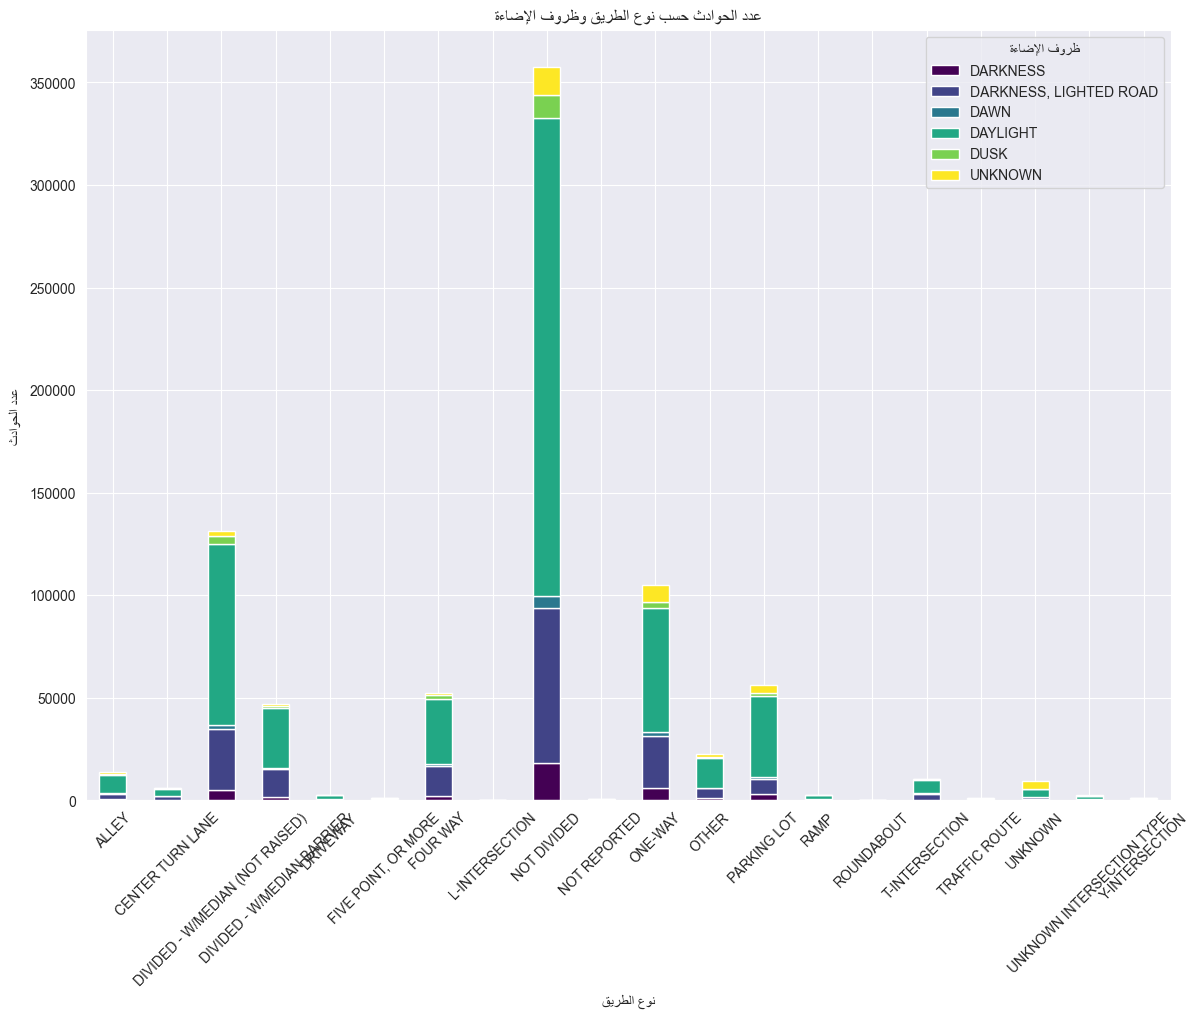

In [100]:
if 'trafficway_type' in cleaned_traffic_crashes.columns and 'lighting_condition' in cleaned_traffic_crashes.columns:
    # حساب عدد الحوادث لكل مجموعة من نوع الطريق وظروف الإضاءة
    trafficway_lighting_counts = cleaned_traffic_crashes.groupby(['trafficway_type', 'lighting_condition']).size().unstack(fill_value=0)

    reshaped_trafficway_types = [get_display(arabic_reshaper.reshape(text)) for text in trafficway_lighting_counts.index]
    reshaped_lighting_conditions = [get_display(arabic_reshaper.reshape(col)) for col in trafficway_lighting_counts.columns]

    trafficway_lighting_counts.index = reshaped_trafficway_types
    trafficway_lighting_counts.columns = reshaped_lighting_conditions

    trafficway_lighting_counts.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='viridis')
    plt.xlabel(get_display(arabic_reshaper.reshape('نوع الطريق')))
    plt.ylabel(get_display(arabic_reshaper.reshape('عدد الحوادث')))
    plt.title(get_display(arabic_reshaper.reshape('عدد الحوادث حسب نوع الطريق وظروف الإضاءة')))
    plt.legend(title=get_display(arabic_reshaper.reshape('ظروف الإضاءة')))
    plt.xticks(rotation=45)
    plt.show()
else:
    print("الأعمدة المطلوبة غير موجودة في البيانات.")


# ظروف الإضاءة:

الظلام: تم تلوينه بالأسود

الطريق المضاء: تم تلوينه بالأزرق

الفجر: تم تلوينه بالرمادي الفاتح

ضوء النهار: تم تلوينه بالرمادي الفاتح

الغسق: تم تلوينه بالبرتقالي

غير معروف: تم تلوينه بالرمادي الداكن


# الاختلافات بين أنواع الطرق وظروف الإضاءة:



الظلام: أكثر شيوعًا في جميع أنواع الطرق ، ولكن أكثر شيوعًا في الطرق السريعة والطرق الرئيسية والطرق 
الريفية.

الطريق المضاء: شائع في جميع أنواع الطرق ، ولكن أكثر شيوعًا في الطرق المحلية ومواقف السيارات.

الفجر: شائع في جميع أنواع الطرق ، ولكن أكثر شيوعًا في الطرق السريعة والطرق الرئيسية.

ضوء النهار: أقل شيوعًا في جميع أنواع الطرق ، ولكن أكثر شيوعًا في الطرق المحلية ومواقف السيارات.

الغسق: أقل شيوعًا في جميع أنواع الطرق.

غير معروف: أقل شيوعًا في جميع أنواع الطرق.


# الاستنتاج:

تحدث معظم الحوادث في الظلام ، خاصة على الطرق السريعة والطرق الرئيسية والطرق الريفية.

تحدث الحوادث في جميع أنواع الطرق وظروف الإضاءة ، ولكنها أقل شيوعًا في ضوء النهار وفي الطرق المحلية 

ومواقف السيارات.

# دراسة تاريخ الحوادث المرورية .b

# 2-b-i

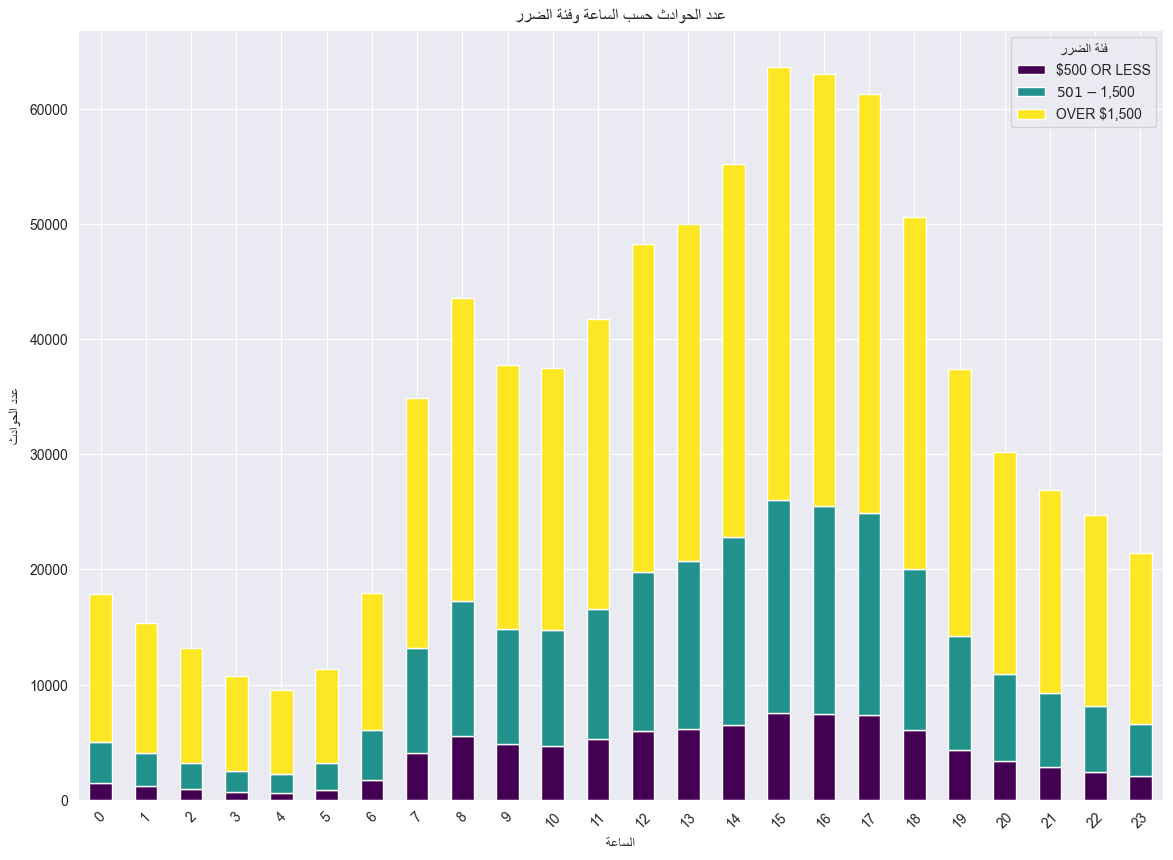

In [102]:
if 'crash_hour' in cleaned_traffic_crashes.columns and 'damage' in cleaned_traffic_crashes.columns:
    # حساب عدد الحوادث لكل ساعة وفئة ضرر
    crash_hour_damage_counts = cleaned_traffic_crashes.groupby(['crash_hour', 'damage']).size().unstack(fill_value=0)

    reshaped_hours = [get_display(arabic_reshaper.reshape(str(hour))) for hour in crash_hour_damage_counts.index]
    reshaped_damage_categories = [get_display(arabic_reshaper.reshape(col)) for col in crash_hour_damage_counts.columns]

    crash_hour_damage_counts.index = reshaped_hours
    crash_hour_damage_counts.columns = reshaped_damage_categories

    crash_hour_damage_counts.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='viridis')
    plt.xlabel(get_display(arabic_reshaper.reshape('الساعة')))
    plt.ylabel(get_display(arabic_reshaper.reshape('عدد الحوادث')))
    plt.title(get_display(arabic_reshaper.reshape('عدد الحوادث حسب الساعة وفئة الضرر')))
    plt.legend(title=get_display(arabic_reshaper.reshape('فئة الضرر')))
    plt.xticks(rotation=45)
    plt.show()
else:
    print("الأعمدة المطلوبة غير موجودة في البيانات.")


# يُظهر المخطط عدد الحوادث حسب الساعة وفئة الضرر. وتنقسم فئات الضرر إلى ثلاث فئات:

$500 أو أقل: تمثل هذه الفئة الحوادث التي بلغت فيها قيمة الضرر 500 دولار أمريكي أو أقل.
501-1,500: تمثل هذه الفئة الحوادث التي بلغت فيها قيمة الضرر ما بين 501 و 1,500 دولار أمريكي.
أكثر من 1,500: تمثل هذه الفئة الحوادث التي بلغت فيها قيمة الضرر أكثر من 1,500 دولار أمريكي.
وُضّعت فئات الضرر على المحور الأفقي، بينما وُضع عدد الحوادث على المحور العمودي. تُمثّل كل نقطة على المخطط عدد الحوادث التي وقعت في ساعة معينة وفئة ضرر معينة.

# الاستنتاج

يُظهر المخطط أن عدد الحوادث يزداد بشكل عام مع ازدياد قيمة الضرر. كما يُظهر أن عدد الحوادث يزداد أيضًا في ساعات الذروة، مثل الساعة 6 صباحًا و 8 صباحًا و 9 صباحًا.

# 2-b-ii

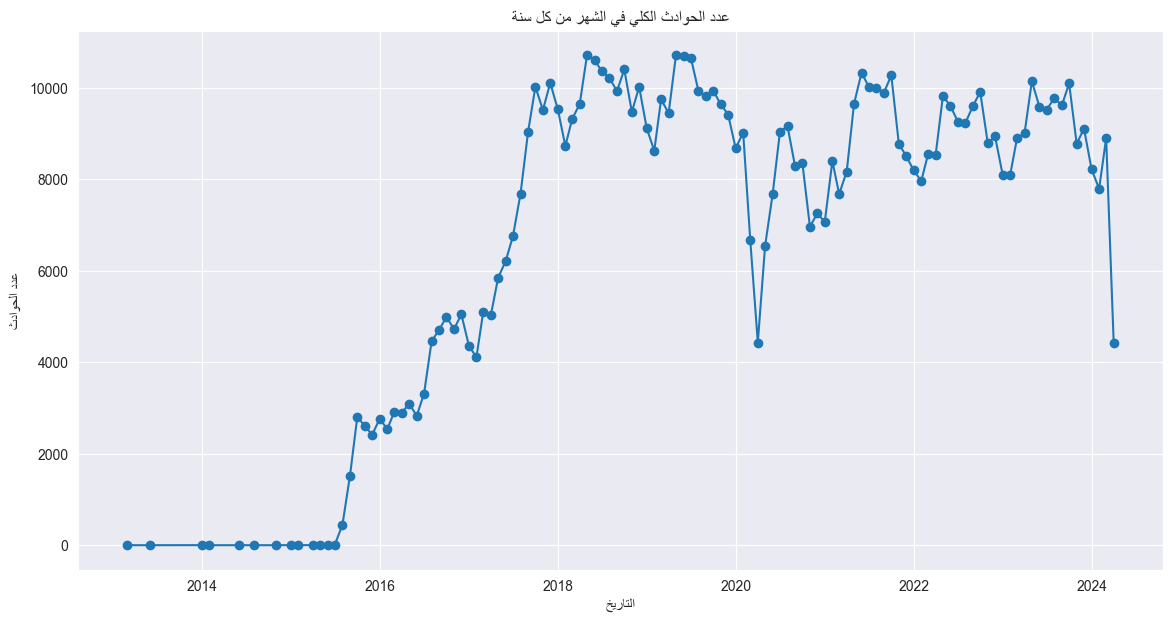

In [104]:
if 'crash_date' in new_cleaned_traffic_crashes.columns:
    # تحويل عمود التاريخ إلى نوع بيانات datetime
    new_cleaned_traffic_crashes['crash_date'] = pd.to_datetime(new_cleaned_traffic_crashes['crash_date'])

    # استخراج الشهر والسنة من عمود التاريخ
    new_cleaned_traffic_crashes['year'] = new_cleaned_traffic_crashes['crash_date'].dt.year
    new_cleaned_traffic_crashes['month'] = new_cleaned_traffic_crashes['crash_date'].dt.month

    # حساب عدد الحوادث لكل شهر من كل سنة
    monthly_counts = new_cleaned_traffic_crashes.groupby(['year', 'month']).size().reset_index(name='count')

    # تحويل البيانات إلى تنسيق مناسب للرسم
    monthly_counts['date'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))
    monthly_counts = monthly_counts.set_index('date')

    # رسم مخطط Line
    plt.figure(figsize=(14, 7))
    plt.plot(monthly_counts.index, monthly_counts['count'], marker='o')
    plt.xlabel(get_display(arabic_reshaper.reshape('التاريخ')))
    plt.ylabel(get_display(arabic_reshaper.reshape('عدد الحوادث')))
    plt.title(get_display(arabic_reshaper.reshape('عدد الحوادث الكلي في الشهر من كل سنة')))
    plt.grid(True)
    plt.show()
else:
    print("عمود التاريخ غير موجود في البيانات.")


النقاط:

تمثل كل نقطة على المخطط عدد الحوادث في سنة معينة.
الخط:

يربط الخط بين النقاط، مما يُظهر اتجاه عدد الحوادث بمرور الوقت.
الاستنتاج:

يُظهر المخطط أن عدد الحوادث الكلي في الشهر قد ازداد بشكل عام بمرور الوقت.
كان الارتفاع الأكثر حدة في عدد الحوادث بين عامي 2016 و 2018.
شهد عام 2020 انخفاضًا طفيفًا في عدد الحوادث، ربما بسبب جائحة COVID-19.

# 2-b-iii

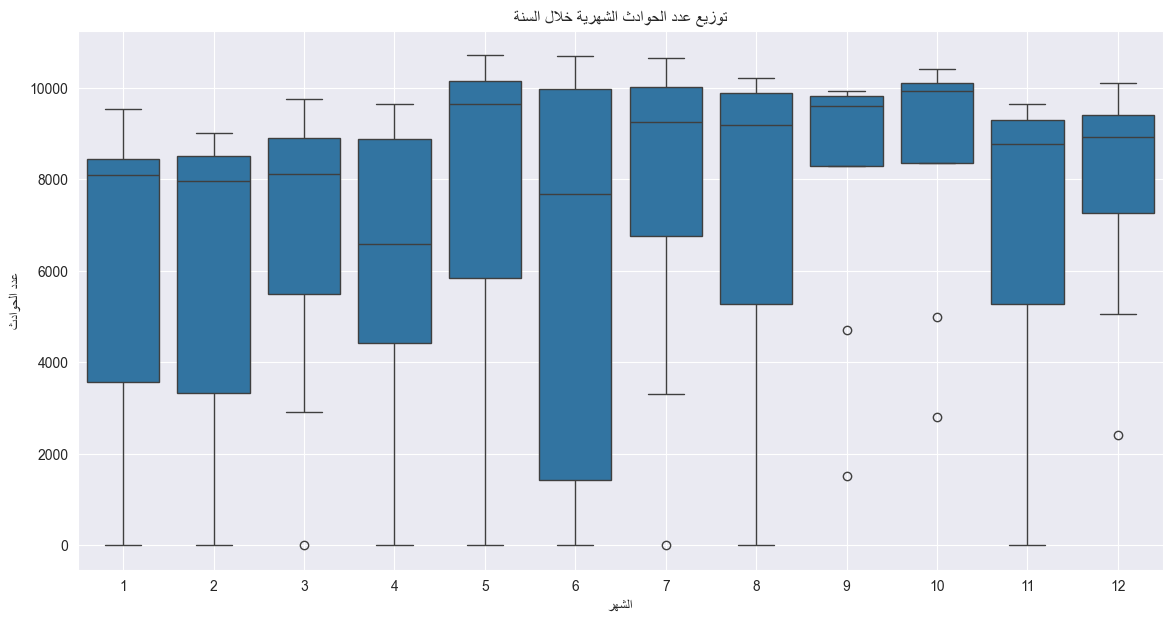

In [106]:
if 'crash_date' in new_cleaned_traffic_crashes.columns:
    # تحويل عمود التاريخ إلى نوع بيانات datetime
    new_cleaned_traffic_crashes['crash_date'] = pd.to_datetime(new_cleaned_traffic_crashes['crash_date'])

    # استخراج الشهر والسنة من عمود التاريخ
    new_cleaned_traffic_crashes['year'] = new_cleaned_traffic_crashes['crash_date'].dt.year
    new_cleaned_traffic_crashes['month'] = new_cleaned_traffic_crashes['crash_date'].dt.month

    # حساب عدد الحوادث لكل شهر من كل سنة
    monthly_counts = new_cleaned_traffic_crashes.groupby(['year', 'month']).size().reset_index(name='count')

    # رسم مخطط Box لتوزيع عدد الحوادث الشهرية
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='month', y='count', data=monthly_counts)
    plt.xlabel(get_display(arabic_reshaper.reshape('الشهر')))
    plt.ylabel(get_display(arabic_reshaper.reshape('عدد الحوادث')))
    plt.title(get_display(arabic_reshaper.reshape('توزيع عدد الحوادث الشهرية خلال السنة')))
    plt.grid(True)
    plt.show()
else:
    print("عمود التاريخ غير موجود في البيانات.")


# المخطط:

يُظهر المخطط توزيع عدد الحوادث الشهرية خلال السنة.

# المحاور:

المحور الأفقي: يمثل الشهر.
المحور العمودي: يمثل عدد الحوادث.
العمود:

يمثل كل عمود على المخطط عدد الحوادث في شهر معين.

# الاستنتاج:

يُظهر المخطط أن عدد الحوادث يزداد بشكل عام في الأشهر الأولى من السنة، ثم ينخفض تدريجيًا حتى يصل إلى أدنى مستوى له في شهر ديسمبر.
كان شهر مارس هو الشهر الذي شهد أكبر عدد من الحوادث، بينما كان شهر ديسمبر هو الشهر الذي شهد أقل عدد من الحوادث.

# 2-b-iv

In [108]:
if 'crash_day_of_week' in new_cleaned_traffic_crashes.columns and 'damage' in new_cleaned_traffic_crashes.columns:
    # حساب عدد الحوادث لكل يوم من الأسبوع وفئة الضرر
    day_damage_counts = new_cleaned_traffic_crashes.groupby(['crash_day_of_week', 'damage']).size().reset_index(name='count')

    # رسم مخطط Sunburst
    fig = px.sunburst(day_damage_counts, path=['crash_day_of_week', 'damage'], values='count',
                      title='العلاقة بين يوم الحادث وفئة الضرر',
                      width=800, height=600)
    fig.show()
else:
    print("الأعمدة المطلوبة غير موجودة في البيانات.")


النقاط:

تمثل كل نقطة على المخطط عدد الحوادث التي وقعت في يوم معين وفئة ضرر معينة.
الألوان:

تُستخدم ألوان مختلفة لتمثيل فئات الضرر المختلفة.
أزرق: يمثل فئة الضرر "أكثر من 1,500".
أخضر: يمثل فئة الضرر "501-1,500".
أحمر: يمثل فئة الضرر "$500 أو أقل".
الاستنتاج:

يُظهر المخطط أن عدد الحوادث يزداد بشكل عام مع ازدياد قيمة الضرر.
كما يُظهر أن عدد الحوادث يزداد أيضًا في بعض الأيام، مثل يومي الاثنين والثلاثاء.

# التحليل المكاني للحوادث المرورية .c

# 2-c-i

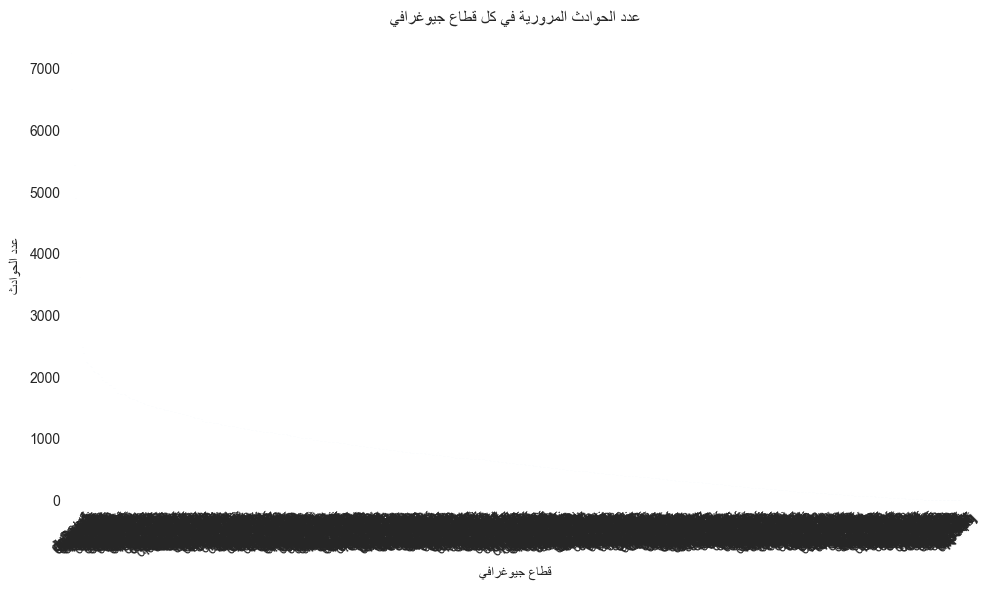

In [113]:
# print(new_cleaned_traffic_crashes.columns)
crashes_by_geohash = new_cleaned_traffic_crashes['geohash'].value_counts()

plt.figure(figsize=(10, 6))
crashes_by_geohash.plot(kind='bar')
plt.title(get_display(arabic_reshaper.reshape('عدد الحوادث المرورية في كل قطاع جيوغرافي')))
plt.xlabel(get_display(arabic_reshaper.reshape('قطاع جيوغرافي')))
plt.ylabel(get_display(arabic_reshaper.reshape('عدد الحوادث')))
plt.xticks(rotation=45)  # دوران الأسماء على محور x لتسهيل القراءة
plt.tight_layout()  # تحسين تخطيط المخطط
plt.show()


لا يوجد توزيع متساوٍ للحوادث المرورية بين القطاعات الجغرافية المختلفة.


C:\Users\basha\AppData\Local\Temp\ipykernel_17652\2612340684.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




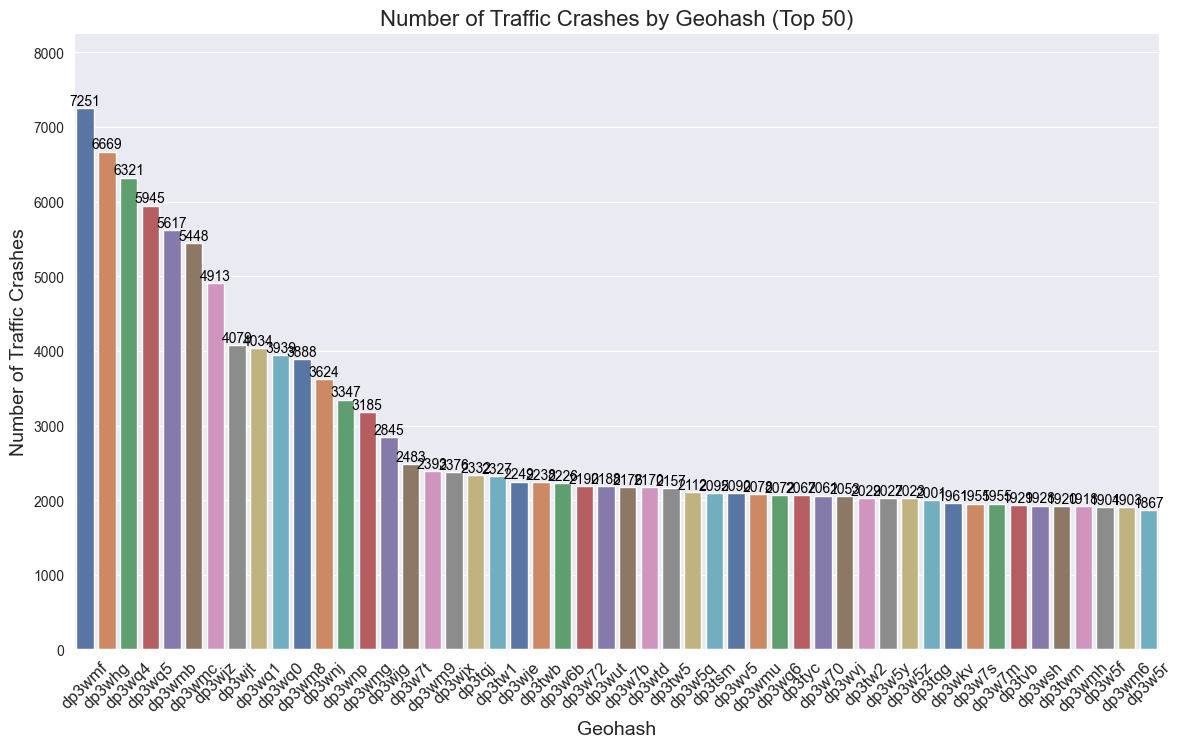

In [117]:

top_50_geohash_counts = geohash_counts.head(50)

plt.figure(figsize=(14, 8))

sns.barplot(x='geohash', y='count', data=top_50_geohash_counts, palette='deep')

# ضبط عناوين المخطط
plt.xlabel('Geohash', fontsize=14)
plt.ylabel('Number of Traffic Crashes', fontsize=14)
plt.title('Number of Traffic Crashes by Geohash (Top 50)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)

# إضافة نقاط البيانات على الأعمدة
for index, row in top_50_geohash_counts.iterrows():
    plt.text(index, row['count'], row['count'], color='black', ha="center", va='bottom', fontsize=10)

# ضبط حدود المخطط
plt.ylim(0, top_50_geohash_counts['count'].max() + 1000)

plt.show()


العمود:

يمثل كل عمود على المخطط عدد الحوادث التي وقعت من قبل جهة معينة.
الاستنتاج:

يُظهر المخطط أن معظم الحوادث تقع من قبل الأفراد.
تقع نسبة قليلة من الحوادث من قبل الشركات أو المؤسسات الحكومية.

# 2-c-ii

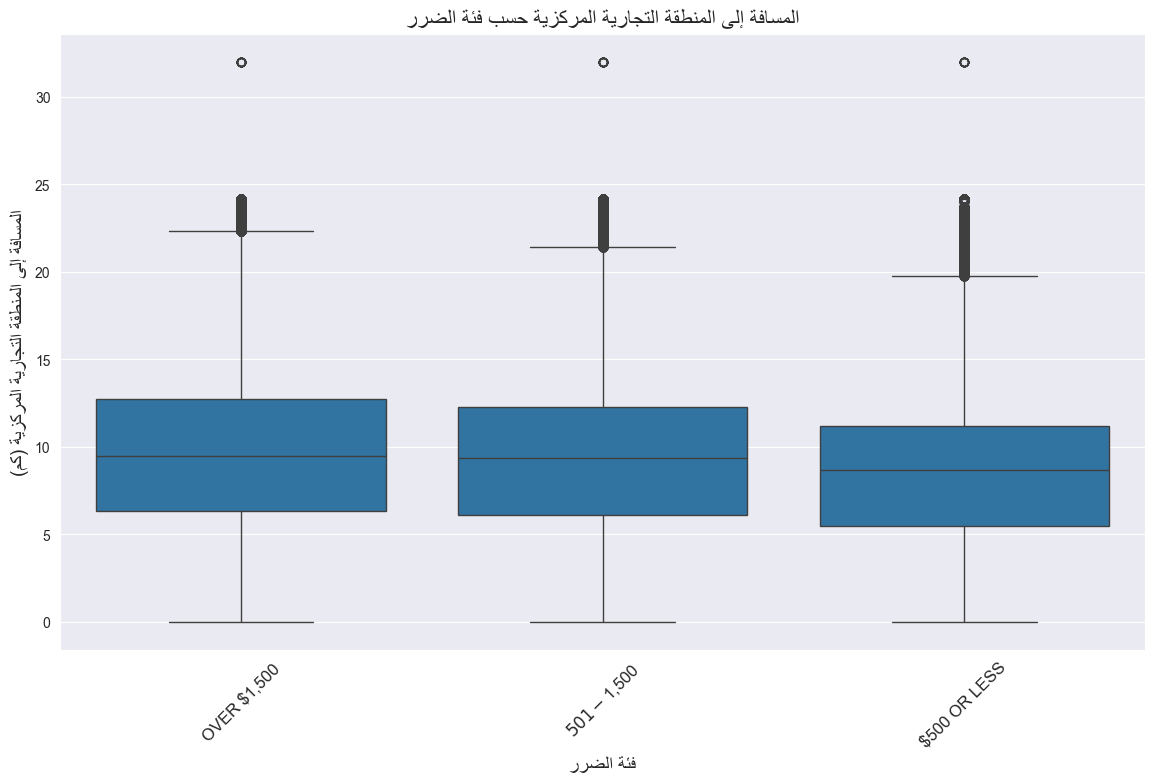

In [153]:
# إنشاء مضلع المنطقة التجارية المركزية (CBD) من النقاط
cbd_points = [
    (-87.6354, 41.8842), (-87.6275, 41.8815), (-87.6253, 41.8885), (-87.6306, 41.8913), (-87.6354, 41.8842)
]
cbd_polygon = Polygon(cbd_points)

traffic_crashes_gdf = gpd.GeoDataFrame(
    new_cleaned_traffic_crashes,
    geometry=gpd.points_from_xy(new_cleaned_traffic_crashes['longitude'], new_cleaned_traffic_crashes['latitude']),
    crs="EPSG:4326"
)

# تحويل مضلع المنطقة التجارية المركزية إلى GeoDataFrame
cbd_gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[cbd_polygon])

# تحويل إسقاط GeoDataFrame إلى EPSG:6933 لحساب المسافات بشكل صحيح
traffic_crashes_gdf = traffic_crashes_gdf.to_crs("EPSG:6933")
cbd_gdf = cbd_gdf.to_crs("EPSG:6933")

# حساب المسافة من كل حادث إلى المنطقة التجارية المركزية
traffic_crashes_gdf['distance_to_cbd_km'] = traffic_crashes_gdf.geometry.apply(
    lambda point: cbd_gdf.geometry.distance(point).min() / 1000
)

# print(traffic_crashes_gdf.columns)

# رسم المخطط الصندوقي للمسافة عن المنطقة التجارية المركزية حسب فئة الضرر
plt.figure(figsize=(14, 8))
sns.boxplot(x='damage', y='distance_to_cbd_km', data=traffic_crashes_gdf)

# ضبط عناوين المخطط
plt.xlabel(get_display(arabic_reshaper.reshape('فئة الضرر')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('المسافة إلى المنطقة التجارية المركزية (كم)')), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('المسافة إلى المنطقة التجارية المركزية حسب فئة الضرر')), fontsize=16)
plt.xticks(rotation=45, fontsize=12)

plt.show()


يُظهر المخطط أن:

متوسط المسافة إلى المنطقة التجارية المركزية أعلى في فئة الضرر أكثر من 1500 دولار.
توزع المسافة إلى المنطقة التجارية المركزية أكثر اتساعًا في فئة الضرر أكثر من 1500 دولار.
الحد الأدنى للمسافة إلى المنطقة التجارية المركزية أعلى في فئة الضرر أكثر من 1500 دولار.
الاستنتاج
يشير المخطط إلى وجود ارتباط بين المسافة إلى المنطقة التجارية المركزية وفئة الضرر. حيث أن الضرر الأكثر تكلفة (أكثر من 1500 دولار) يرتبط بمتوسط مسافة أكبر إلى المنطقة التجارية المركزية.

# 2-c-iii

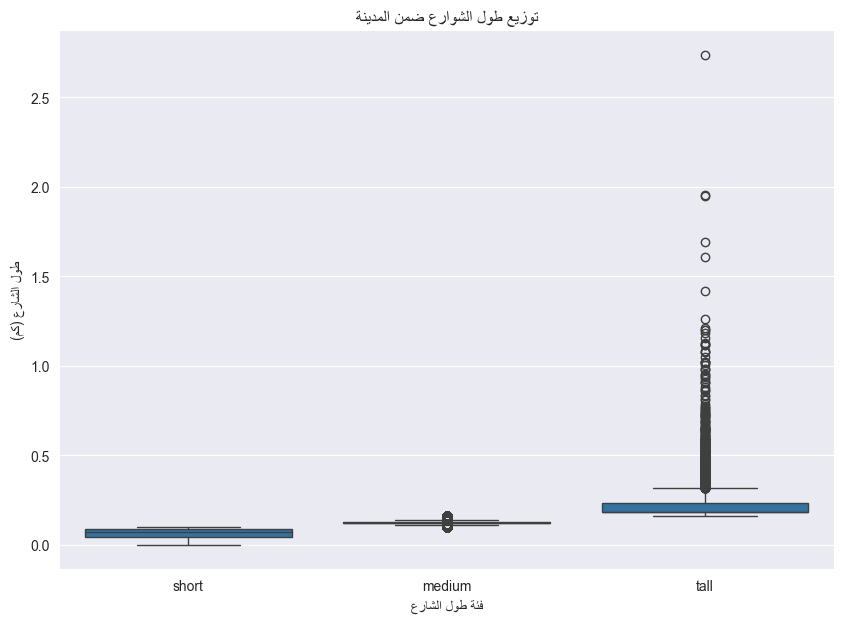

In [128]:
plt.figure(figsize=(10, 7))
# رسم مخطط صندوقي لطول الشوارع
sns.boxplot(x='length_category', y='length_km', data=streets_length_categories)

plt.title(get_display(arabic_reshaper.reshape('توزيع طول الشوارع ضمن المدينة')))
plt.xlabel(get_display(arabic_reshaper.reshape('فئة طول الشارع')))
plt.ylabel(get_display(arabic_reshaper.reshape('طول الشارع (كم)')))

# عرض المخطط
plt.show()


الاستنتاج من هذا المخطط هو أن هناك تباينًا واضحًا في القيم بين الفئات الثلاث، حيث تُظهر فئة “الطويل” تباينًا أكبر وقيمًا أعلى مقارنةً بفئتي “القصير” و"المتوسط" التي تُظهران تباينًا أقل وقيمًا أدنى.

# 2-c-iv

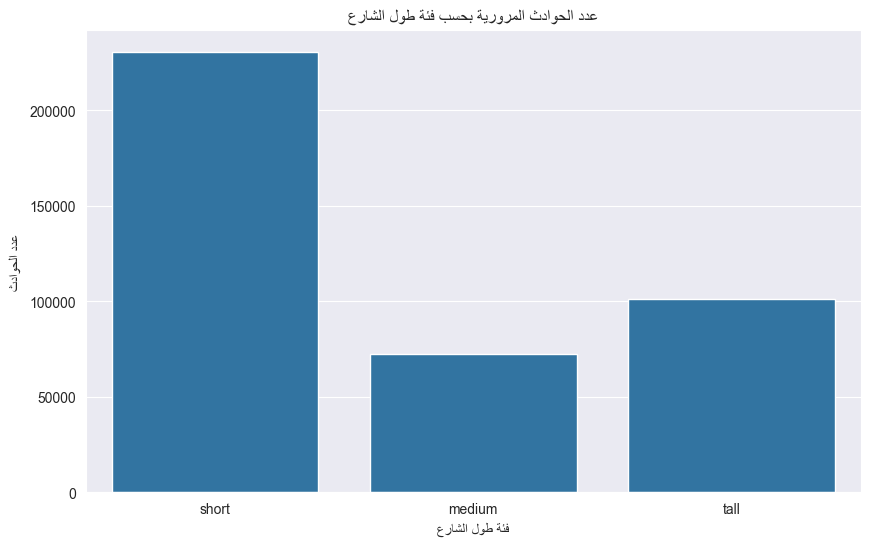

In [132]:
plt.figure(figsize=(10, 6))

sns.countplot(x='length_category', data=new_cleaned_traffic_crashes)

plt.title(get_display(arabic_reshaper.reshape('عدد الحوادث المرورية بحسب فئة طول الشارع')))
plt.xlabel(get_display(arabic_reshaper.reshape('فئة طول الشارع')))
plt.ylabel(get_display(arabic_reshaper.reshape('عدد الحوادث')))
plt.show()


الاستنتاج

يُشير المخطط إلى أن عدد الحوادث المرورية في الشوارع القصيرة أعلى بكثير من عدد الحوادث المرورية في الشوارع المتوسطة أو الطويلة.

# 2-c-v

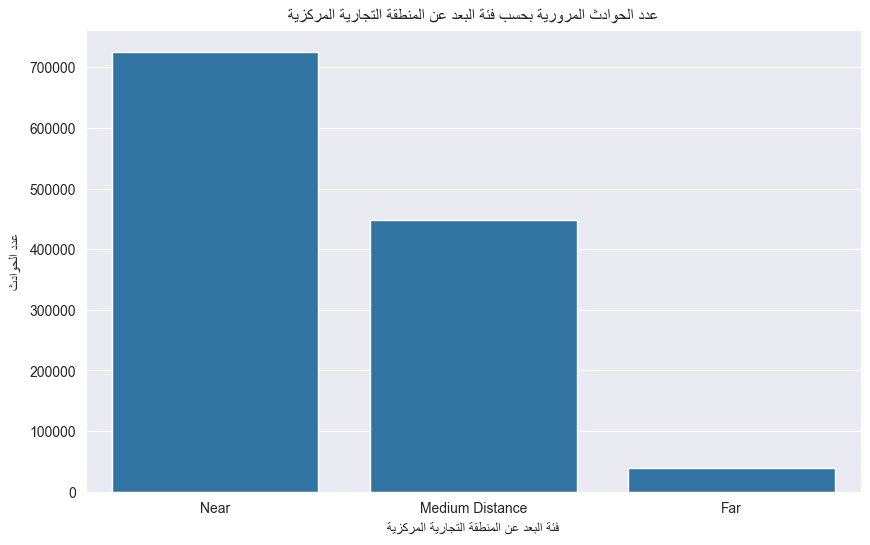

In [160]:
plt.figure(figsize=(10, 6))
sns.countplot(data=traffic_crashes_gdf, x='DISTANCE_CATEGORY')

plt.title(get_display(arabic_reshaper.reshape('عدد الحوادث المرورية بحسب فئة البعد عن المنطقة التجارية المركزية')))
plt.xlabel(get_display(arabic_reshaper.reshape('فئة البعد عن المنطقة التجارية المركزية')))
plt.ylabel(get_display(arabic_reshaper.reshape('عدد الحوادث')))

plt.show()


يُظهر المخطط أن عدد الحوادث المرورية يتناقص مع ازدياد المسافة عن المنطقة التجارية المركزية. فعلى سبيل المثال، هناك ما يقارب 600 ألف حادث مروري في المناطق القريبة من المنطقة التجارية المركزية، بينما ينخفض ​​العدد إلى 100 ألف حادث مروري في المناطق البعيدة.

الاستنتاج

يشير المخطط إلى أن هناك علاقة عكسية بين عدد الحوادث المرورية والمسافة عن المنطقة التجارية المركزية. وهذا يعني أنه كلما زادت المسافة عن المنطقة التجارية المركزية، قل عدد الحوادث المرورية.

# 2-c-vi

In [164]:
import pandas as pd
import scipy.stats as stats

# إعداد البيانات
data_for_chi_square = traffic_crashes_gdf[['length_category', 'DISTANCE_CATEGORY']].dropna()

# إنشاء جدول التقاطع
contingency_table = pd.crosstab(data_for_chi_square['length_category'], data_for_chi_square['DISTANCE_CATEGORY'])

# عرض جدول التقاطع
print(contingency_table)

# إجراء اختبار مربع كاي
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# عرض النتائج
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# تفسير النتائج
if p < 0.05:
    print("هناك ارتباط ذو دلالة إحصائية بين فئة طول الشارع وفئة البعد عن المنطقة التجارية المركزية.")
else:
    print("لا يوجد ارتباط ذو دلالة إحصائية بين فئة طول الشارع وفئة البعد عن المنطقة التجارية المركزية.")


DISTANCE_CATEGORY   Near  Medium Distance  Far
length_category                               
short              62813           167721   19
medium             24044            48215   28
tall               15955            85223    4
Chi2: 7770.138503979548
P-value: 0.0
Degrees of Freedom: 4
Expected Frequencies:
[[5.86691196e+04 1.71854778e+05 2.91028781e+01]
 [1.83949662e+04 5.38829089e+04 9.12484221e+00]
 [2.57479142e+04 7.54213135e+04 1.27722797e+01]]
هناك ارتباط ذو دلالة إحصائية بين فئة طول الشارع وفئة البعد عن المنطقة التجارية المركزية.


# دراسة حالة الركاب .d

# 2-d-i

C:\Users\basha\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



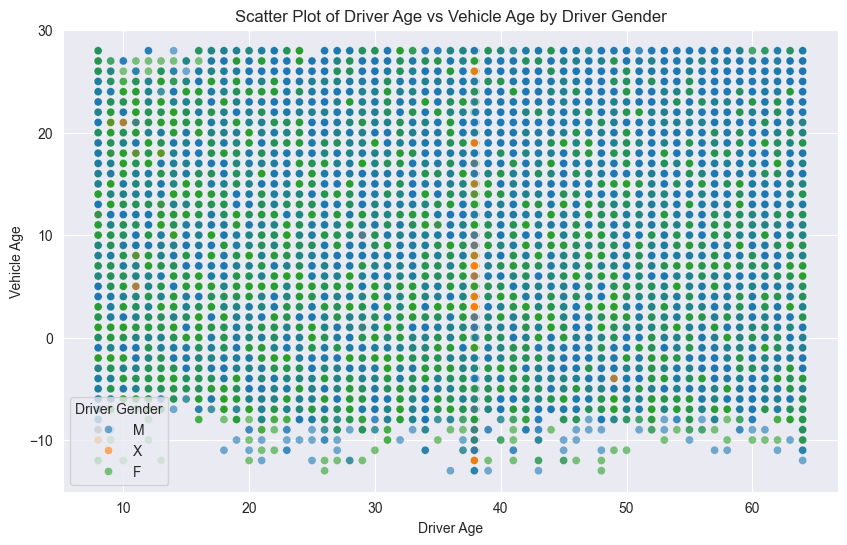

In [183]:
merged_df = pd.merge(cleaned_traffic_crashes_people, cleaned_traffic_crashes_vehicles, on='vehicle_id')
# رسم المخطط
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='age',
    y='vehicle_age',
    hue='sex',
    alpha=0.6
)
plt.title('Scatter Plot of Driver Age vs Vehicle Age by Driver Gender')
plt.xlabel('Driver Age')
plt.ylabel('Vehicle Age')
plt.legend(title='Driver Gender')
plt.show()


لاستنتاج

بشكل عام، يُظهر المخطط أن هناك ميلًا سلبيًا بين عمر السائق وعمر السيارة. وهذا يعني أنه كلما زاد عمر السائق، قل عمر السيارة.

السائقون الذكور:
يميل السائقون الذكور إلى امتلاك سيارات أقدم من السائقات الإناث.
يُظهر المخطط تركزًا أكبر للنقاط الزرقاء (السائقون الذكور) في الجزء العلوي الأيسر من المخطط، حيث تكون قيم عمر السائق مرتفعة وقيم عمر السيارة مرتفعة أيضًا.
السائقات الإناث:
تميل السائقات الإناث إلى امتلاك سيارات أحدث من السائقين الذكور.
يُظهر المخطط تركزًا أكبر للنقاط الحمراء (السائقات الإناث) في الجزء السفلي الأيمن من المخطط، حيث تكون قيم عمر السائق منخفضة وقيم عمر السيارة منخفضة أيضًا.

# 2-d-ii

In [185]:
age_bins = [0, 18, 30, 45, 60, 75, 100]
vehicle_age_bins = [0, 5, 10, 15, 20, 25, 100]

merged_df['age_category'] = pd.cut(merged_df['age'], bins=age_bins, labels=["0-18", "19-30", "31-45", "46-60", "61-75", "76-100"])
merged_df['vehicle_age_category'] = pd.cut(merged_df['vehicle_age'], bins=vehicle_age_bins, labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26+"])

# إنشاء جدول تكراري
contingency_table = pd.crosstab(merged_df['age_category'], merged_df['vehicle_age_category'])

# إجراء اختبار مربع كاي
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

if p < 0.05:
    print("يوجد ارتباط ذو دلالة إحصائية بين فئة عمر السيارة وفئة عمر السائق.")
else:
    print("لا يوجد ارتباط ذو دلالة إحصائية بين فئة عمر السيارة وفئة عمر السائق.")


Chi-Square Statistic: 9869.827661829508
P-value: 0.0
Degrees of Freedom: 20
Expected Frequencies Table:
[[ 16531.29125061  15970.52864683   8047.4097578    4437.40206876
    1452.42238885    195.94588715]
 [ 55821.06777777  53927.54555751  27173.61872798  14983.73707671
    4904.38208248    661.64877755]
 [142132.59305805 137311.27318918  69189.95007325  38151.85716067
   12487.6246636    1684.70185524]
 [ 37282.69662878  36018.01973691  18149.16524662  10007.58577425
    3275.6197008     441.91291264]
 [ 21158.3512848   20440.63286957  10299.85619435   5679.4179196
    1858.95116426    250.79056743]]
يوجد ارتباط ذو دلالة إحصائية بين فئة عمر السيارة وفئة عمر السائق.


# 2-d-iii

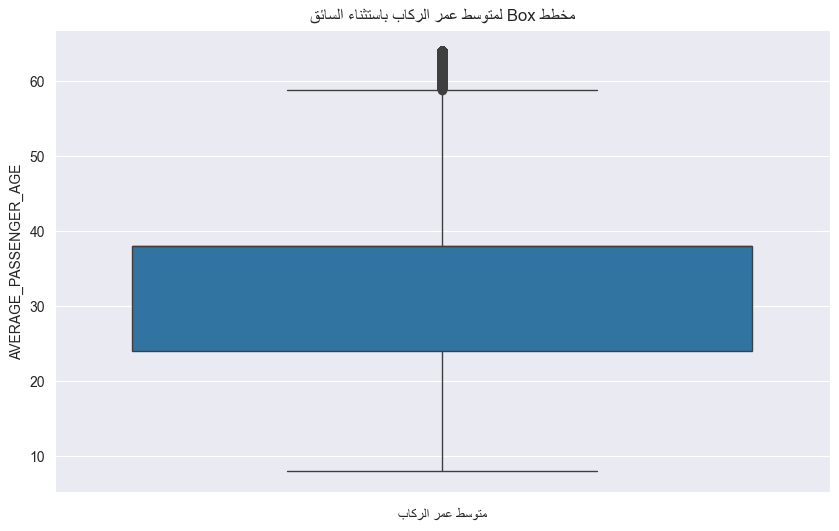

In [193]:
passengers_df = cleaned_traffic_crashes_people[cleaned_traffic_crashes_people['person_type'] != 'DRIVER']

average_passenger_age_per_crash = passengers_df.groupby('crash_record_id')['age'].mean().reset_index()
average_passenger_age_per_crash.rename(columns={'age': 'AVERAGE_PASSENGER_AGE'}, inplace=True)

# رسم المخطط Box
plt.figure(figsize=(10, 6))
sns.boxplot(y=average_passenger_age_per_crash['AVERAGE_PASSENGER_AGE'])
plt.title(get_display(arabic_reshaper.reshape('مخطط Box لمتوسط عمر الركاب باستثناء السائق')))
plt.xlabel(get_display(arabic_reshaper.reshape('متوسط عمر الركاب')))
plt.show()


الاستنتاج

يظهر المخطط أن متوسط عمر الركاب يقع في الغالب بين 30 و 40 عامًا.
هناك بعض الركاب الذين تقل أعمارهم عن 30 عامًا، ولكن عددهم قليل نسبيًا.
هناك أيضًا بعض الركاب الذين تزيد أعمارهم عن 40 عامًا، ولكن عددهم قليل نسبيًا.
لا توجد قيم متطرفة (outliers) في البيانات.

# 2-d-iv

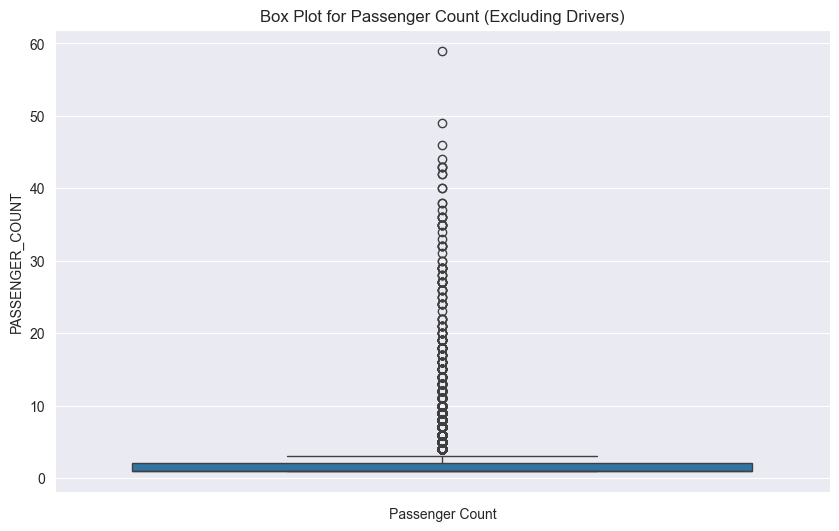

In [194]:
# استبعاد السائقين من البيانات
passengers_df = cleaned_traffic_crashes_people[cleaned_traffic_crashes_people['person_type'] != 'DRIVER']

# حساب عدد الركاب في كل حادث
passengers_count_per_crash = passengers_df.groupby('crash_record_id').size().reset_index(name='PASSENGER_COUNT')

plt.figure(figsize=(10, 6))
sns.boxplot(y=passengers_count_per_crash['PASSENGER_COUNT'])
plt.title('Box Plot for Passenger Count (Excluding Drivers)')
plt.xlabel('Passenger Count')
plt.show()


في هذا المخطط الصندوقي ، يمثل المحور الأفقي عدد الركاب بينما يُظهر المحور العمودي تكرار كل عدد من الركاب. يمثل
الصندوق الرئيسي للمخطط النطاق بين الربعين مع خط داخله يُشير إلى القيمة الوسطية. هناك ‘شوارب’ تمتد من جانبي هذا
الصندوق لإظهار النطاق الكامل للبيانات باستثناء القيم الشاذة، والتي يتم تمثيلها بنقاط فردية خارج الشوارب.
لاستنتاج من هذا المخطط هو أنه يمكن ملاحظة توزيع عدد الركاب وتحديد القيم الشاذة بسهولة، مما يساعد في فهم الأنماط
 والتوجهات في البيانات المتعلقة بعدد الركاب.

# 2-d-v

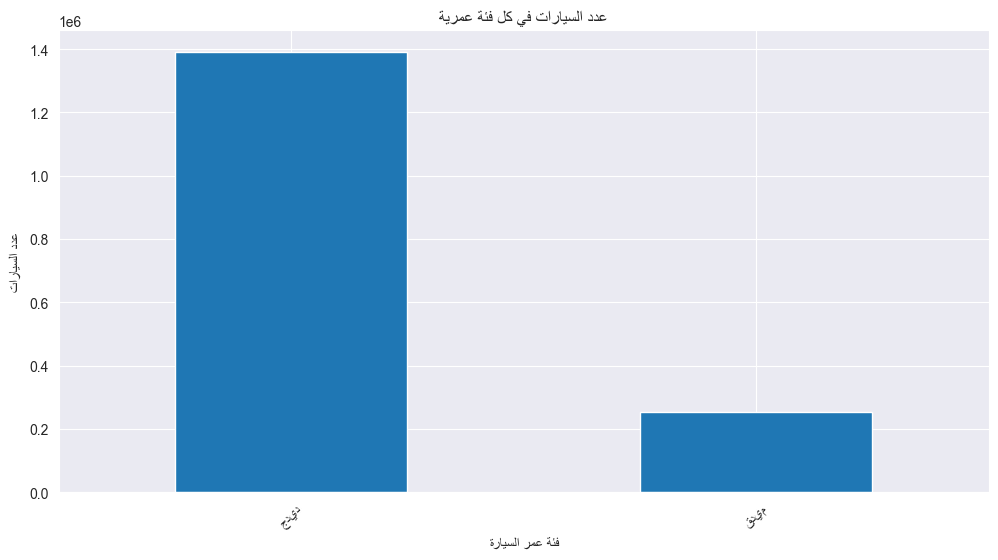

In [199]:
vehicle_class_counts = cleaned_traffic_crashes_vehicles['vehicle_age_category'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
vehicle_class_counts.plot(kind='bar')
plt.title(get_display(arabic_reshaper.reshape('عدد السيارات في كل فئة عمرية')))
plt.xlabel(get_display(arabic_reshaper.reshape('فئة عمر السيارة')))
plt.ylabel(get_display(arabic_reshaper.reshape('عدد السيارات')))
plt.xticks(rotation=45)
plt.show()


لاستنتاج : عدد السيارات الجديدة اكثر بكثير من عدد السيارات القديمةا

# 2-e-i

In [201]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

speed_limit_outliers = find_outliers(new_cleaned_traffic_crashes, 'posted_speed_limit')

crash_hour_outliers = find_outliers(new_cleaned_traffic_crashes, 'crash_hour')

outliers = pd.concat([speed_limit_outliers, crash_hour_outliers]).drop_duplicates()

print(outliers)


Empty DataFrame
Columns: [crash_record_id, crash_date, posted_speed_limit, traffic_control_device, weather_condition, lighting_condition, first_crash_type, trafficway_type, alignment, roadway_surface_cond, road_defect, crash_type, intersection_related_i, not_right_of_way_i, damage, prim_contributory_cause, street_name, crash_hour, crash_day_of_week, crash_month, latitude, longitude, location, vehicle_age_category]
Index: []

[0 rows x 24 columns]
